**Mushroom Classification**

**Problem Statement:**

Which features are most indicative of a poisonous mushroom?

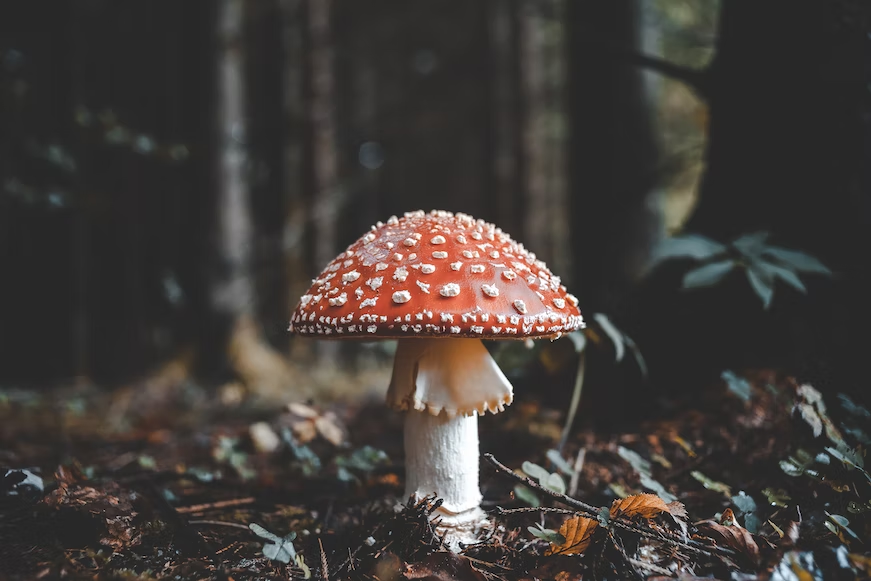

**About Dataset**

**Context**

>Although this dataset was originally contributed to the UCI Machine Learning repository nearly 30 years ago, mushroom hunting (otherwise known as "shrooming") is enjoying new peaks in popularity. Learn which features spell certain death and which are most palatable in this dataset of mushroom characteristics. And how certain can your model be?

**Content**

>This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

- Time period: Donated to UCI ML 27 April 1987

**Inspiration**

>What types of machine learning models perform best on this dataset?

>Which features are most indicative of a poisonous mushroom?

**Acknowledgements**

>This dataset was originally donated to the UCI Machine Learning repository. You can learn more about past research using the data here.

**Attribute Information:**

1.**class_ep:** edible=e, poisonous=p

2.**cap_shape:** bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

3.**cap_surface:** fibrous=f,grooves=g,scaly=y,smooth=s

4.**cap_color:** brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

5.**bruises:** bruises=t,no=f

6.**odor:** almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

7.**gill_attachment:** attached=a,descending=d,free=f,notched=n

8.**gill_spacing:** close=c,crowded=w,distant=d

9.**gill_size:** broad=b,narrow=n

10.**gill_color:** black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

11.**stalk_shape:** enlarging=e,tapering=t

12.**stalk_root:** bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

13.**stalk_surface-above-ring:** fibrous=f,scaly=y,silky=k,smooth=s

14.**stalk_surface-below-ring:** fibrous=f,scaly=y,silky=k,smooth=s

15.**stalk_color-above-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

16.**stalk_color-below-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

17.**veil_type:** partial=p,universal=u

18.**veil_color:** brown=n,orange=o,white=w,yellow=y

19.**ring_number:** none=n,one=o,two=t

20.**ring_type:** cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

21.**spore_print_color:** black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

22.**population:** abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

23.**habitat:** grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing filterwarnings to ignore warning messages**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**Import Required Library**

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error, r2_score

#Classification model 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC


from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier

**Data Preprocessing**

**Importing Dataset**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Projects/Mushroom Classification/mushrooms.csv")
pd.set_option('display.max_columns', None)
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


**Creating a copy of original dataset**

In [ ]:
df = data.copy()
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


**Exploratory Data Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
df.shape

(8124, 23)

In [ ]:
df.size

186852

In [ ]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

**Data Cleaning**

In [ ]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
df[df.duplicated()]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


No duplicates data is there in the dataset

In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [ ]:
for feature in df.columns[:]:
    print(feature,":",len(df[feature].unique()),'labels')

class : 2 labels
cap-shape : 6 labels
cap-surface : 4 labels
cap-color : 10 labels
bruises : 2 labels
odor : 9 labels
gill-attachment : 2 labels
gill-spacing : 2 labels
gill-size : 2 labels
gill-color : 12 labels
stalk-shape : 2 labels
stalk-root : 5 labels
stalk-surface-above-ring : 4 labels
stalk-surface-below-ring : 4 labels
stalk-color-above-ring : 9 labels
stalk-color-below-ring : 9 labels
veil-type : 1 labels
veil-color : 4 labels
ring-number : 3 labels
ring-type : 5 labels
spore-print-color : 9 labels
population : 6 labels
habitat : 7 labels


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [ ]:
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,0,2,2,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,0,2,2,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,0,3,2,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,0,2,2,2,7,7,0,2,1,4,2,3,3


In [ ]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
df.to_csv("/content/drive/MyDrive/Projects/Mushroom Classification/mushrooms_data.csv")

In [ ]:
df["veil-type"].value_counts()

0    8124
Name: veil-type, dtype: int64

Column **veil-type** is 0 and not contributing to the data so i will drop it.

In [ ]:
df = df.drop(["veil-type"],axis = 1)

In [ ]:
df.shape

(8124, 22)

In [ ]:
df.size

178728

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [ ]:
df.dtypes

class                       int64
cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object

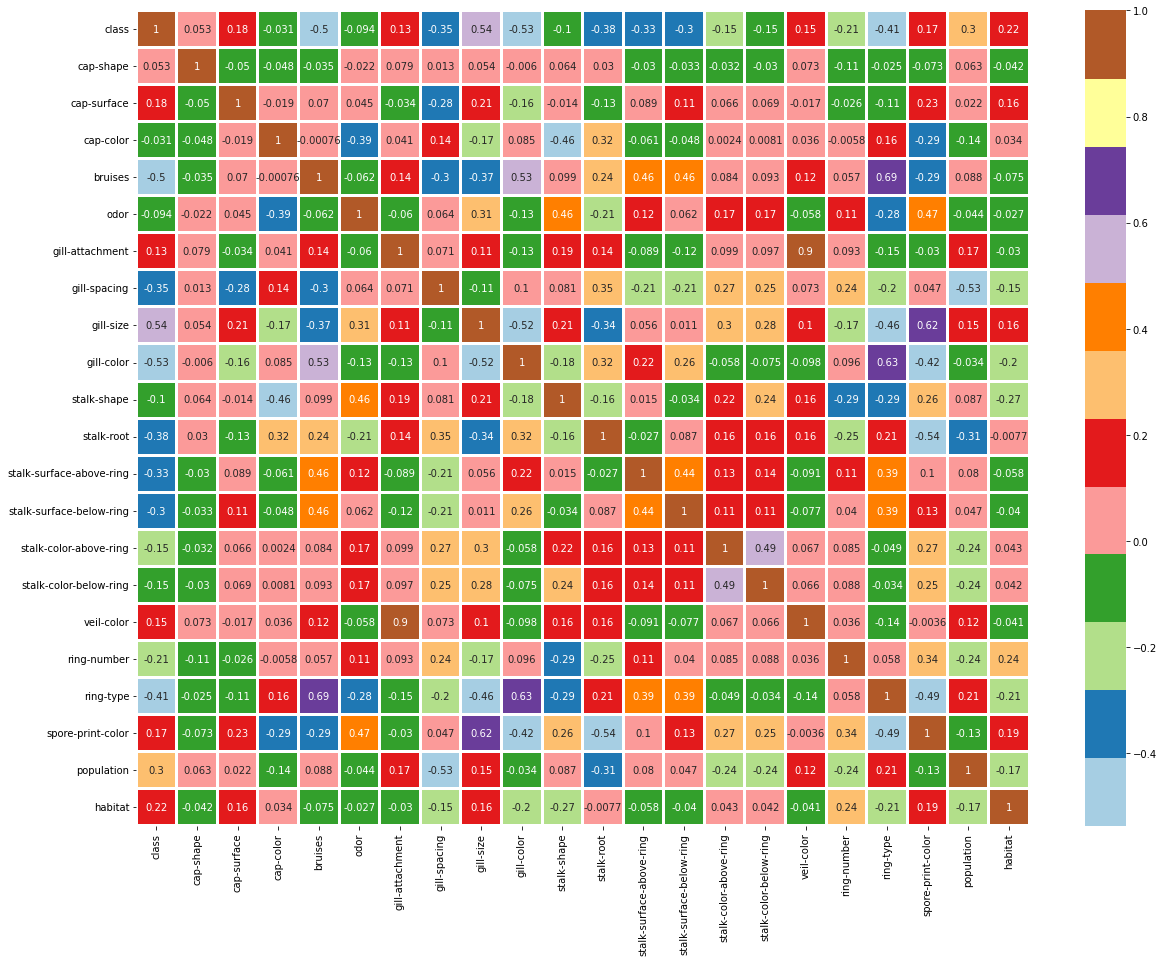

In [ ]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(),annot = True, cmap = "Paired", linewidths = 2)

**Data Visualisation**

**Visualizing the count of edible and poisonous mushrooms**

In [ ]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [ ]:
df["class"].unique()

array([1, 0])

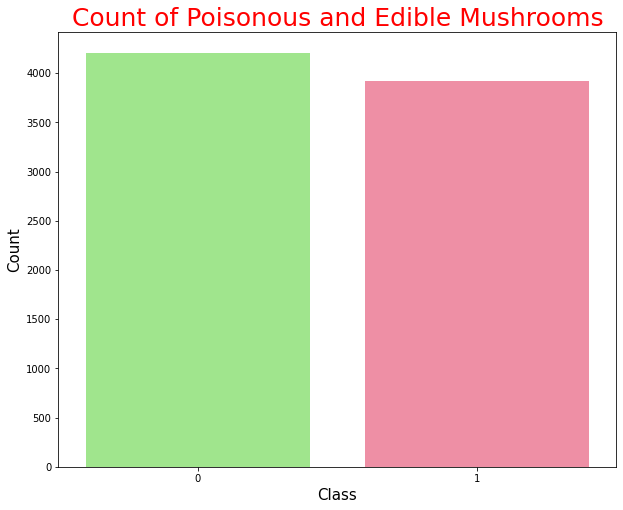

In [ ]:
from matplotlib import colors
count = df['class'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(count.index, count.values, alpha=0.5, palette="prism")
plt.ylabel('Count', fontsize=15)
plt.xlabel('Class', fontsize=15)
plt.title('Count of Poisonous and Edible Mushrooms', size = 25, color = 'Red')
plt.show()


In [ ]:
df["class"].value_counts()

0    4208
1    3916
Name: class, dtype: int64

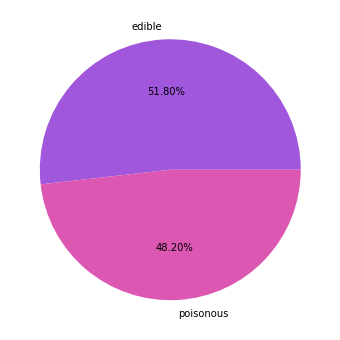

In [ ]:
plt.figure(figsize=(6, 6))
mushrooms = ['edible','poisonous']
count = [len(df[df['class'] == 0]),len(df[df['class'] == 1])]
colors = sns.color_palette("hls", 8)[6:8]
plt.pie(count, labels = mushrooms,colors=colors,autopct='%1.2f%%')
plt.show()

**We can consider it as a balanace data set since there is no much diffrance in both the category**

In [ ]:
df['cap-shape'].value_counts()

5    3656
2    3152
3     828
0     452
4      32
1       4
Name: cap-shape, dtype: int64

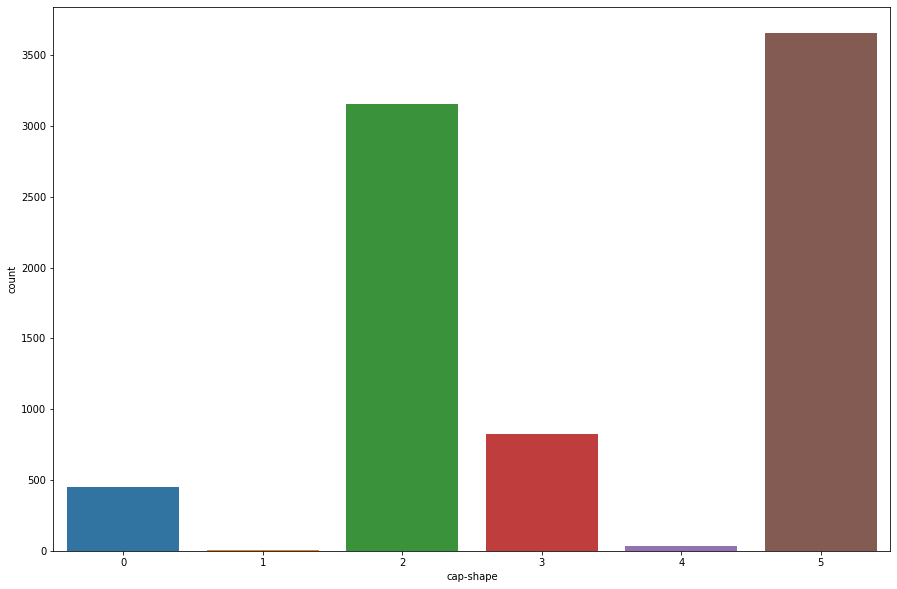

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(data=df,x='cap-shape')

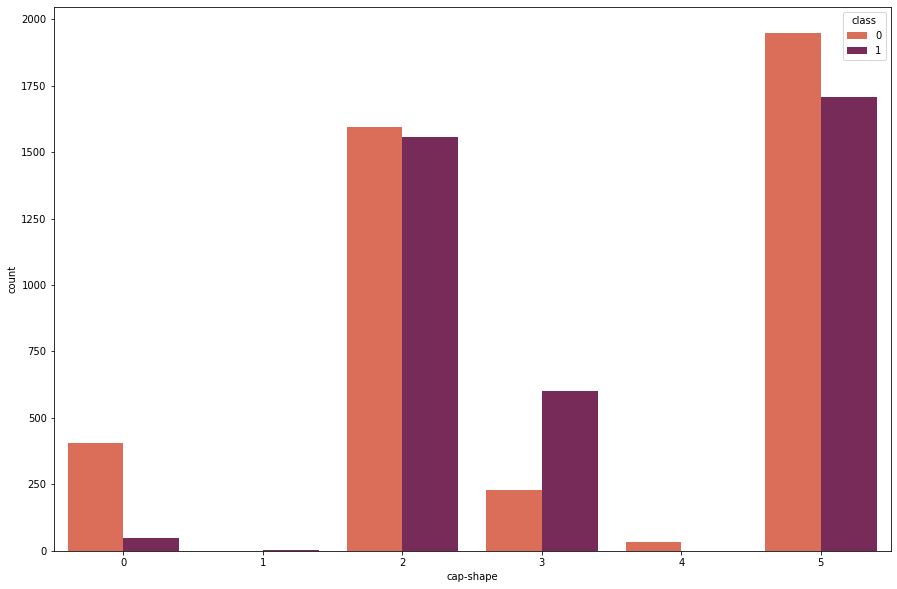

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(data=df,x='cap-shape',hue='class',palette='rocket_r')

In [ ]:
df.groupby('cap-shape')['class'].value_counts()

cap-shape  class
0          0         404
           1          48
1          1           4
2          0        1596
           1        1556
3          1         600
           0         228
4          0          32
5          0        1948
           1        1708
Name: class, dtype: int64

1. All conical mushrooms are poisonous
2. All sunken mushrooms edible

In [ ]:
df['cap-surface'].value_counts()

3    3244
2    2556
0    2320
1       4
Name: cap-surface, dtype: int64

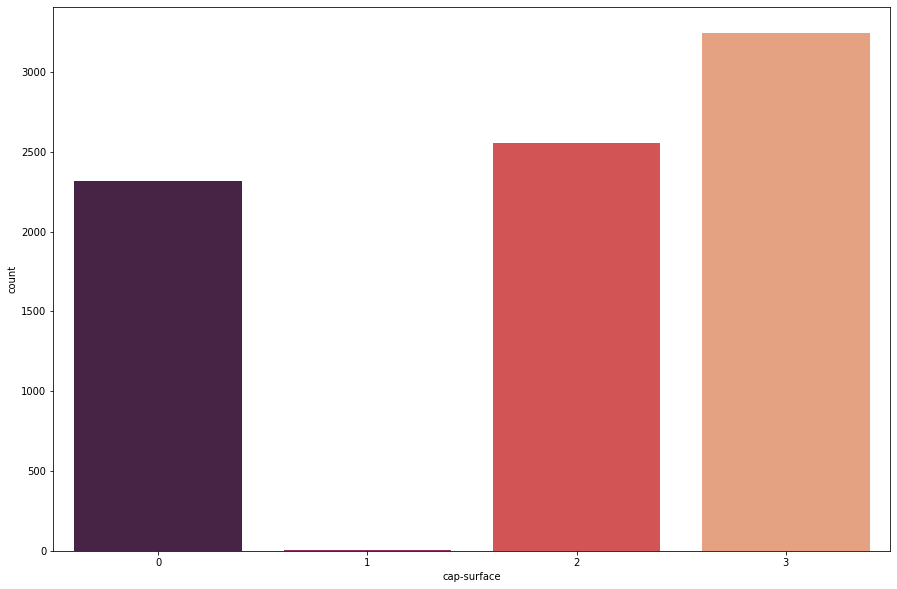

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(data=df,x='cap-surface',palette='rocket')

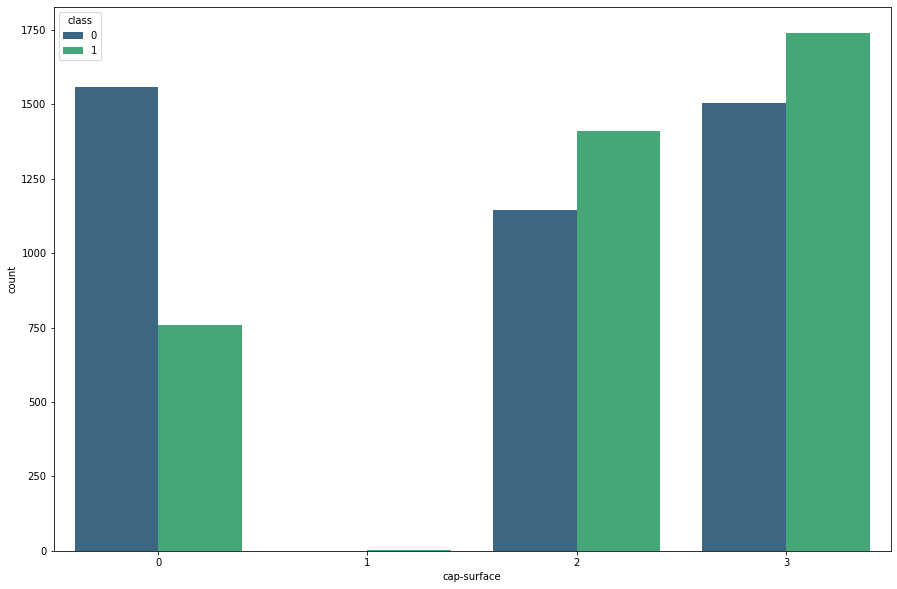

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(data=df,x='cap-surface',hue='class',palette='viridis')

In [ ]:
df.groupby('cap-surface')['class'].value_counts()

cap-surface  class
0            0        1560
             1         760
1            1           4
2            1        1412
             0        1144
3            1        1740
             0        1504
Name: class, dtype: int64

**All mushrooms with grooves are poisonous**

In [ ]:
df['cap-color'].value_counts()

4    2284
3    1840
2    1500
9    1072
8    1040
0     168
5     144
1      44
7      16
6      16
Name: cap-color, dtype: int64

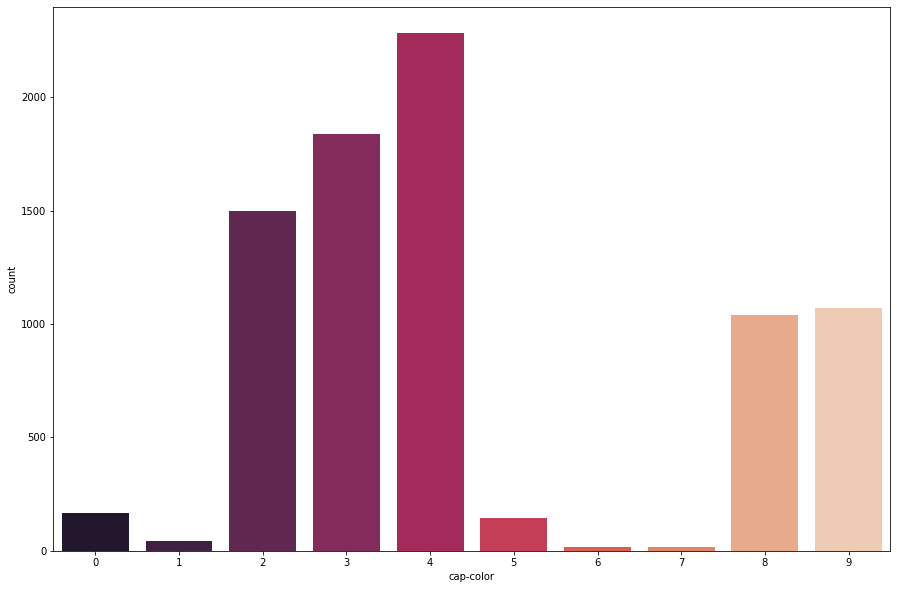

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(data=df,x='cap-color',palette='rocket')

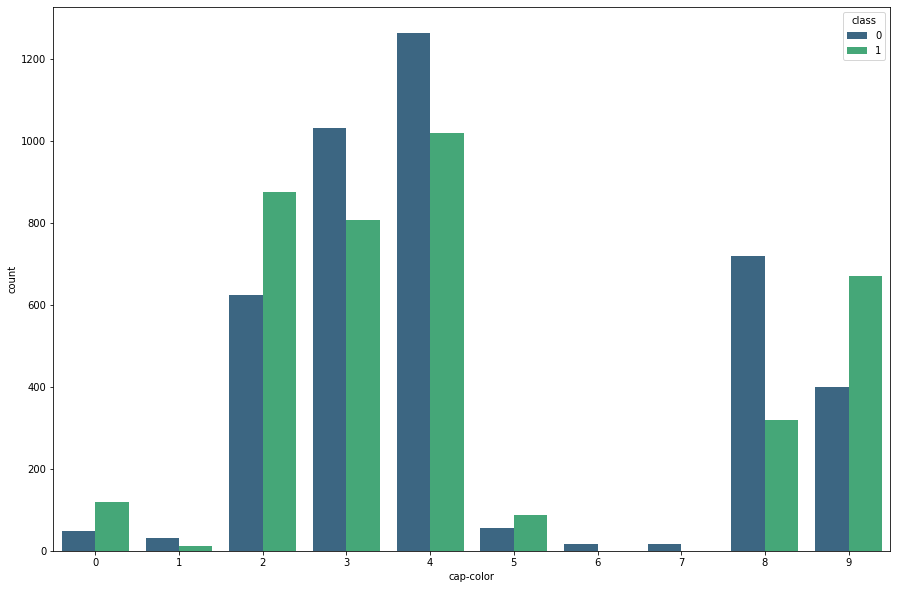

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(data=df,x='cap-color',hue='class',palette='viridis')

In [ ]:
df.groupby('cap-color')['class'].value_counts()

cap-color  class
0          1         120
           0          48
1          0          32
           1          12
2          1         876
           0         624
3          0        1032
           1         808
4          0        1264
           1        1020
5          1          88
           0          56
6          0          16
7          0          16
8          0         720
           1         320
9          1         672
           0         400
Name: class, dtype: int64

**Green and Purple mushrooms are edible**

In [ ]:
df['bruises'].value_counts()

0    4748
1    3376
Name: bruises, dtype: int64

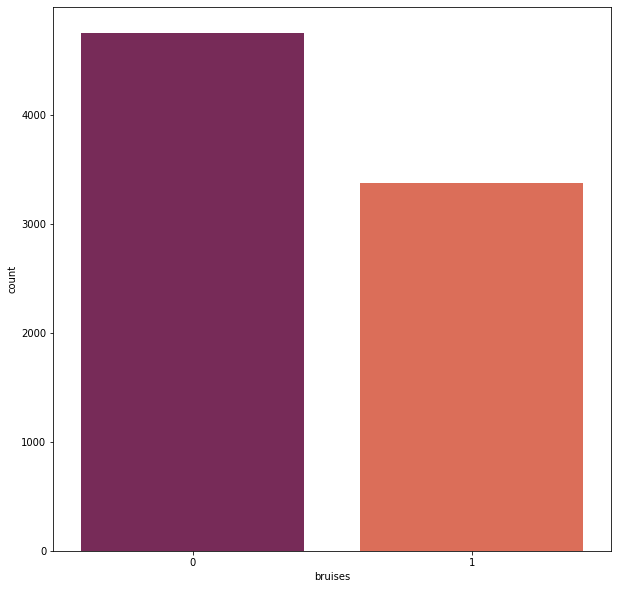

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(data=df,x='bruises',palette='rocket')

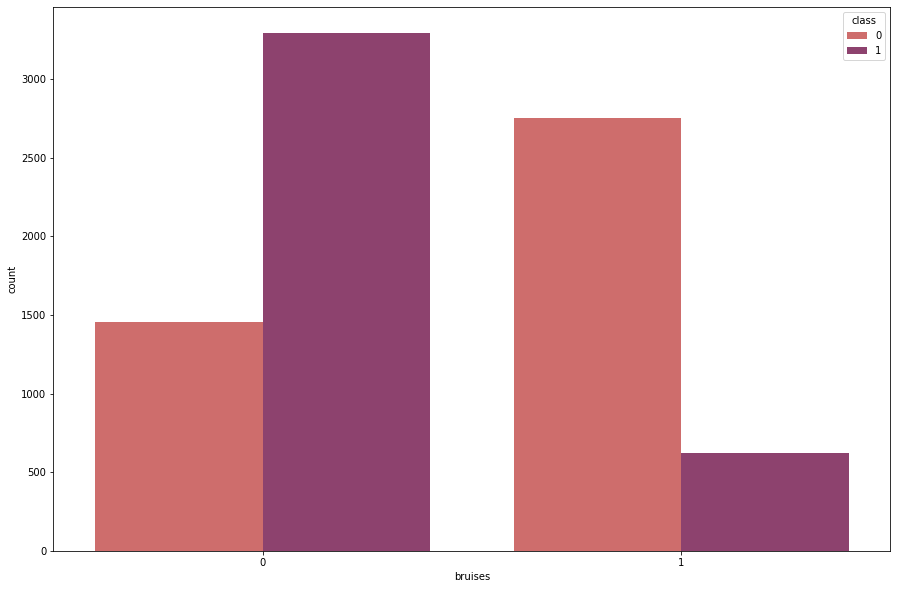

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(data=df,x='bruises',hue='class',palette='flare')

In [ ]:
df['bruises'].value_counts()

0    4748
1    3376
Name: bruises, dtype: int64

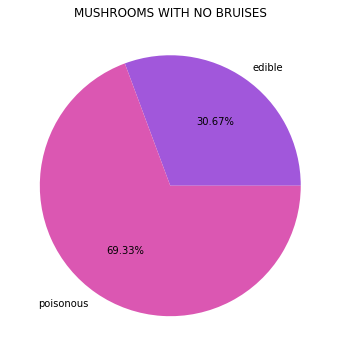

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
classx = ['edible','poisonous']
df2 = df[df['bruises'] == 0]
count = [len(df2[df2['class'] == 0]),len(df2[df2['class'] == 1])]
colors = sns.color_palette("hls", 8)[6:8]
plt.title('MUSHROOMS WITH NO BRUISES')
plt.pie(count, labels = mushrooms,colors=colors,autopct='%1.2f%%')
plt.show()

**Mushrooms with no bruises are more likely to be poisonous**

In [ ]:
df['odor'].value_counts()

5    3528
2    2160
8     576
7     576
0     400
3     400
6     256
1     192
4      36
Name: odor, dtype: int64

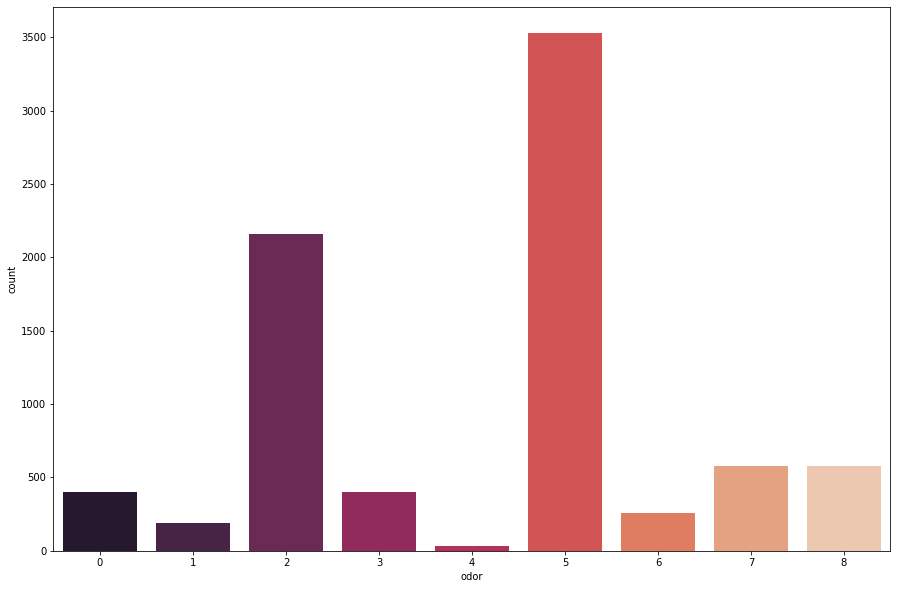

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(data=df,x='odor',palette='rocket')

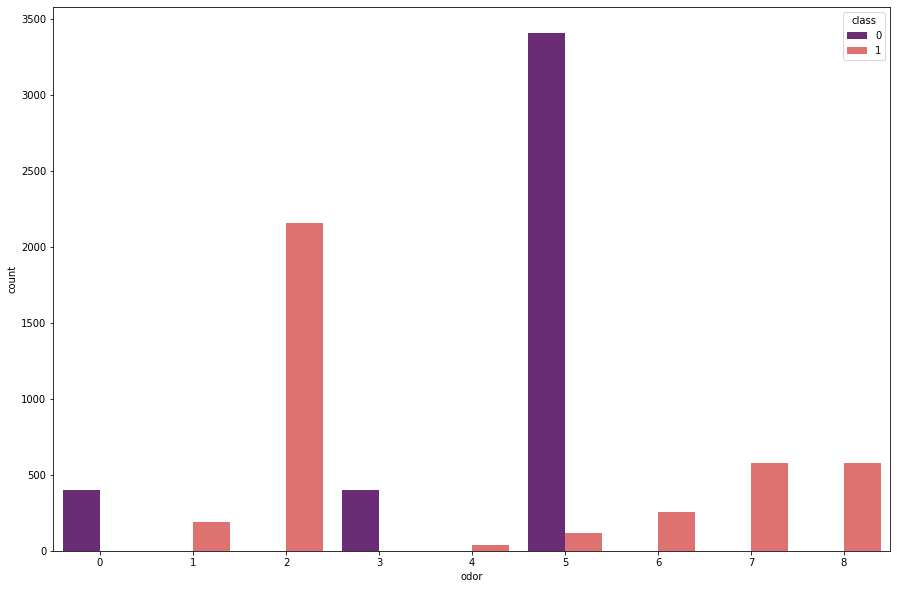

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(data=df,x='odor',hue='class',palette='magma')
plt.show()

- pungent,foul,creosote,fishy,spicy,musty smelling mushrooms are poisnous
- anise,almond smelling mushrooms are edible

In [ ]:
df['odor'].value_counts()

5    3528
2    2160
8     576
7     576
0     400
3     400
6     256
1     192
4      36
Name: odor, dtype: int64

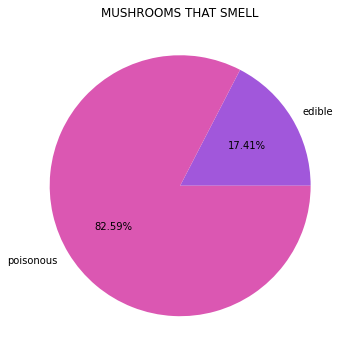

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
clasx = ['edible','poisonous']
df2 = df[df['odor'] != 5]
plt.title('MUSHROOMS THAT SMELL')
count = [len(df2[df2['class'] == 0]),len(df2[df2['class'] == 1])]
colors = sns.color_palette("hls", 8)[6:8]
plt.pie(count, labels = mushrooms,colors=colors,autopct='%1.2f%%')
plt.show()

**Mushrooms that smell are very likely to be poisonous**

In [ ]:
df['gill-attachment'].value_counts()

1    7914
0     210
Name: gill-attachment, dtype: int64

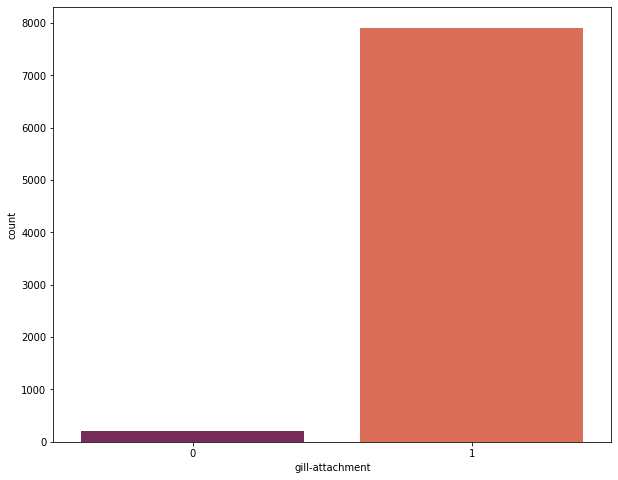

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=df,x='gill-attachment',palette='rocket')

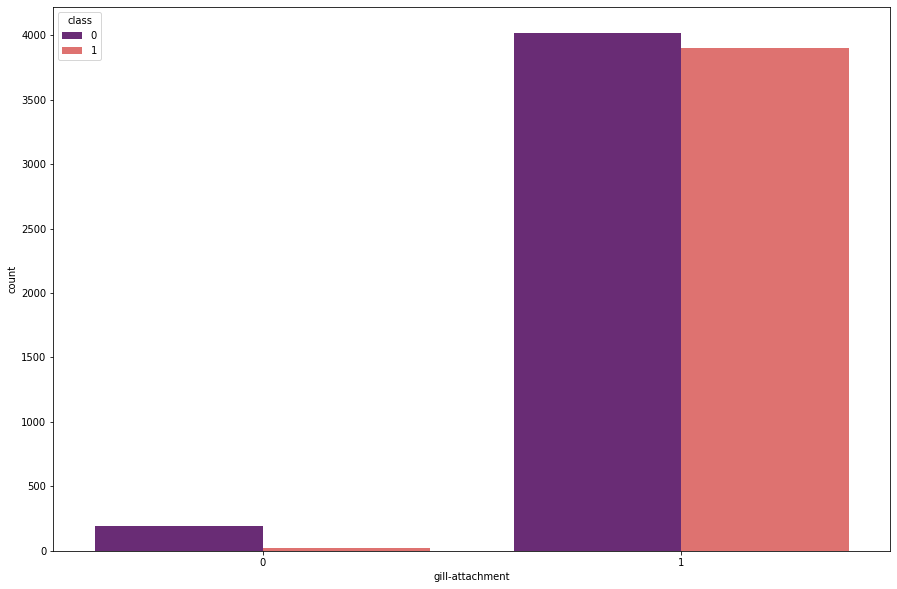

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(data=df,x='gill-attachment',hue='class',palette='magma')
plt.show()

In [ ]:
df['gill-attachment'].value_counts()

1    7914
0     210
Name: gill-attachment, dtype: int64

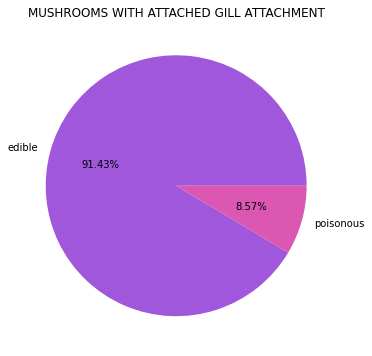

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
clasx = ['edible','poisonous']
df2 = df[df['gill-attachment'] != 1]
count = [len(df2[df2['class'] == 0]),len(df2[df2['class'] == 1])]
colors = sns.color_palette("hls", 8)[6:8]
plt.title('MUSHROOMS WITH ATTACHED GILL ATTACHMENT')
plt.pie(count, labels = mushrooms,colors=colors,autopct='%1.2f%%')
plt.show()

**Most mushrooms with attached gill are edible**

In [ ]:
df['gill-spacing'].value_counts()

0    6812
1    1312
Name: gill-spacing, dtype: int64

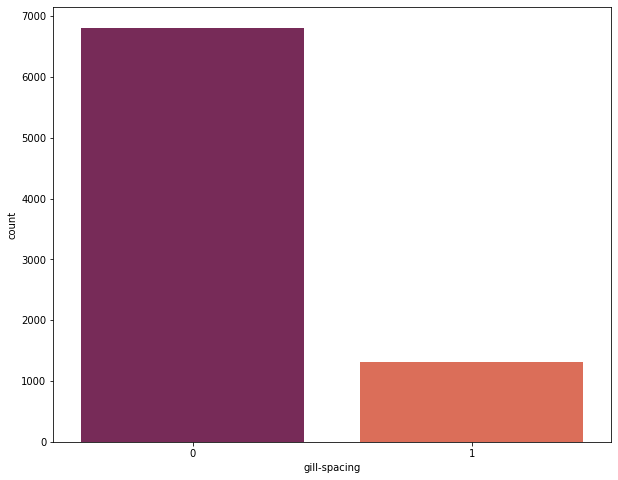

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=df,x='gill-spacing',palette='rocket')

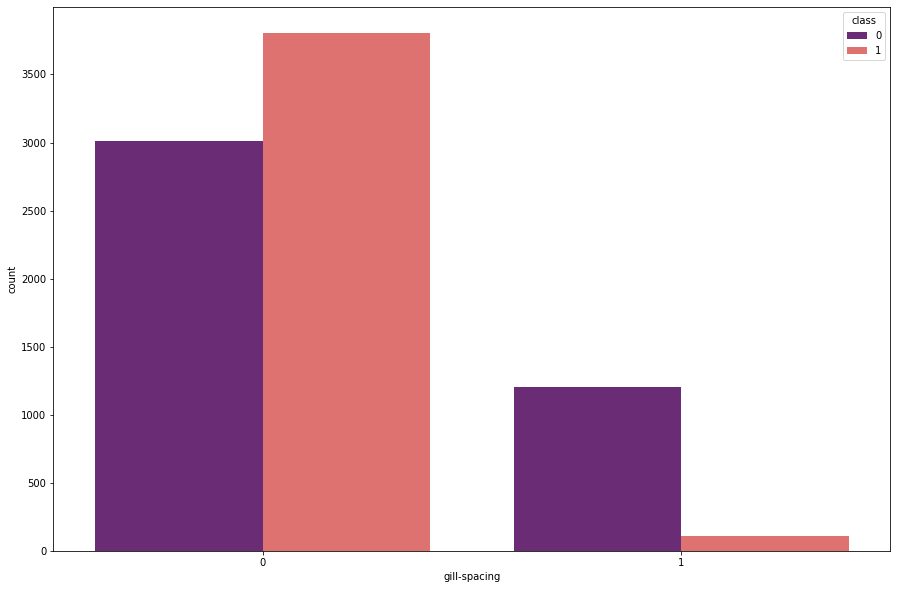

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(data=df,x='gill-spacing',hue='class',palette='magma')
plt.show()

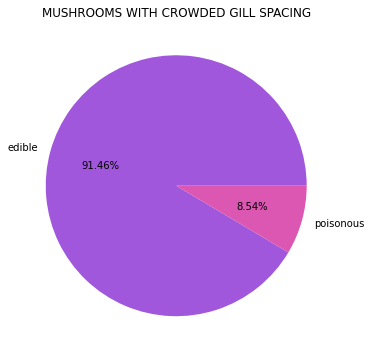

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
clasx = ['edible','poisonous']
df2 = df[df['gill-spacing'] != 0]
count = [len(df2[df2['class'] == 0]),len(df2[df2['class'] == 1])]
colors = sns.color_palette("hls", 8)[6:8]
plt.title('MUSHROOMS WITH CROWDED GILL SPACING')
plt.pie(count, labels = mushrooms,colors=colors,autopct='%1.2f%%')
plt.show()

In [ ]:
df['gill-size'].value_counts()

0    5612
1    2512
Name: gill-size, dtype: int64

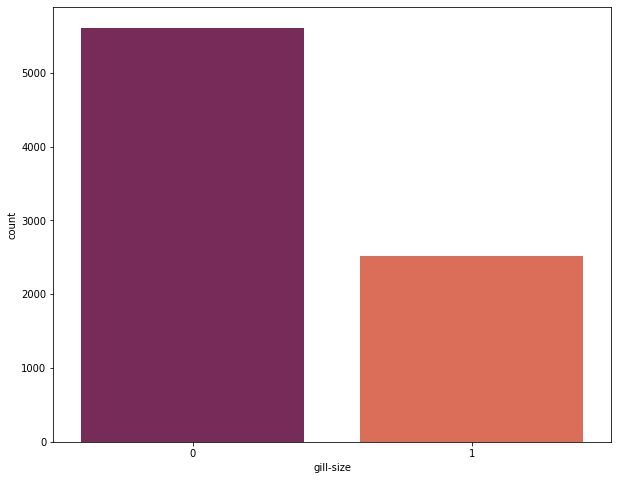

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=df,x='gill-size',palette='rocket')

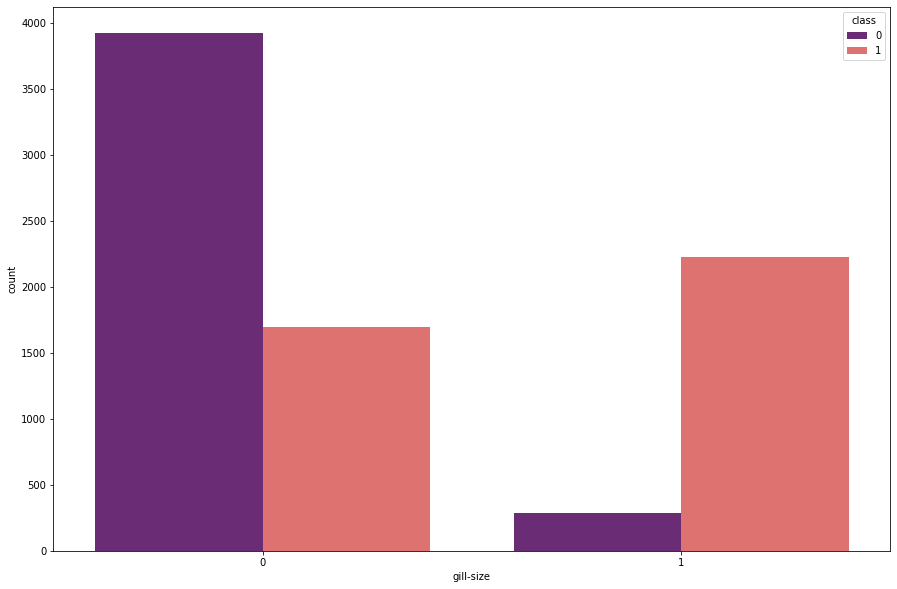

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(data=df,x='gill-size',hue='class',palette='magma')
plt.show()

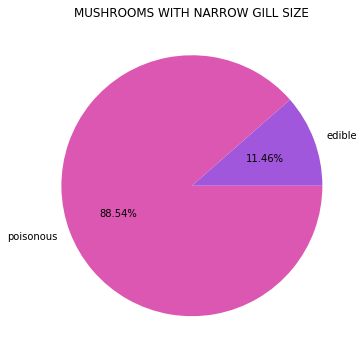

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
clasx = ['edible','poisonous']
df2 = df[df['gill-size'] != 0]
count = [len(df2[df2['class'] == 0]),len(df2[df2['class'] == 1])]
colors = sns.color_palette("hls", 8)[6:8]
plt.title('MUSHROOMS WITH NARROW GILL SIZE')
plt.pie(count, labels = mushrooms,colors=colors,autopct='%1.2f%%')
plt.show()

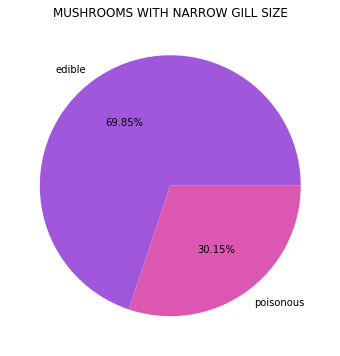

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
clasx = ['edible','poisonous']
df2 = df[df['gill-size'] != 1]
count = [len(df2[df2['class'] == 0]),len(df2[df2['class'] == 1])]
colors = sns.color_palette("hls", 8)[6:8]
plt.title('MUSHROOMS WITH NARROW GILL SIZE')
plt.pie(count, labels = mushrooms,colors=colors,autopct='%1.2f%%')
plt.show()

In [ ]:
df['gill-color'].value_counts()

0     1728
7     1492
10    1202
5     1048
2      752
3      732
9      492
4      408
1       96
11      86
6       64
8       24
Name: gill-color, dtype: int64

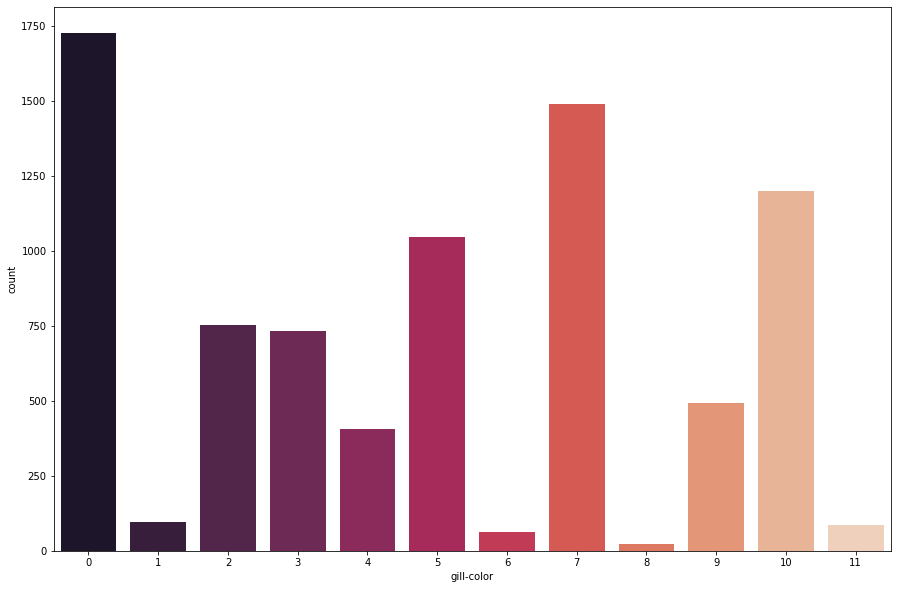

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(data=df,x='gill-color',palette='rocket')

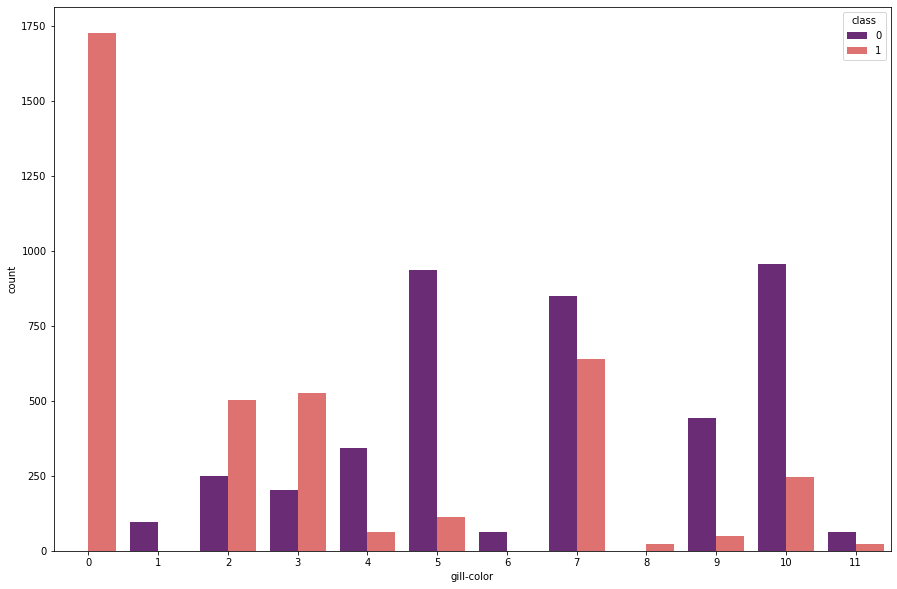

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(data=df,x='gill-color',hue='class',palette='magma')
plt.show()

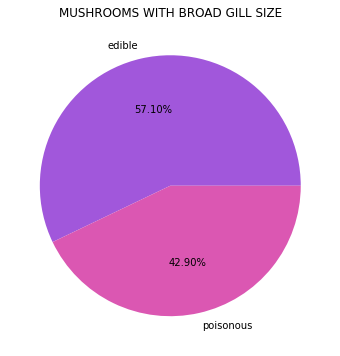

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
clasx = ['edible','poisonous']
df2 = df[df['gill-color'] == 7]
count = [len(df2[df2['class'] == 0]),len(df2[df2['class'] == 1])]
colors = sns.color_palette("hls", 8)[6:8]
plt.title('MUSHROOMS WITH BROAD GILL SIZE')
plt.pie(count, labels = mushrooms,colors=colors,autopct='%1.2f%%')
plt.show()

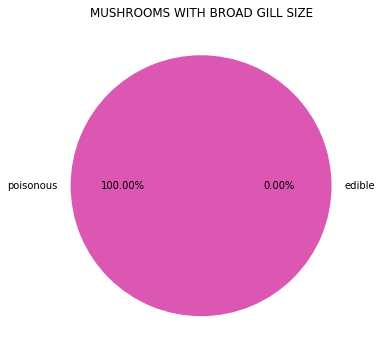

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
clasx = ['edible','poisonous']
df2 = df[df['gill-color'] == 0]
count = [len(df2[df2['class'] == 0]),len(df2[df2['class'] == 1])]
colors = sns.color_palette("hls", 8)[6:8]
plt.title('MUSHROOMS WITH BROAD GILL SIZE')
plt.pie(count, labels = mushrooms,colors=colors,autopct='%1.2f%%')
plt.show()

- **Mushrooms with gill color buff,green are poisonous**

- **red,orange are edible**

In [ ]:
df['stalk-shape'].value_counts()

1    4608
0    3516
Name: stalk-shape, dtype: int64

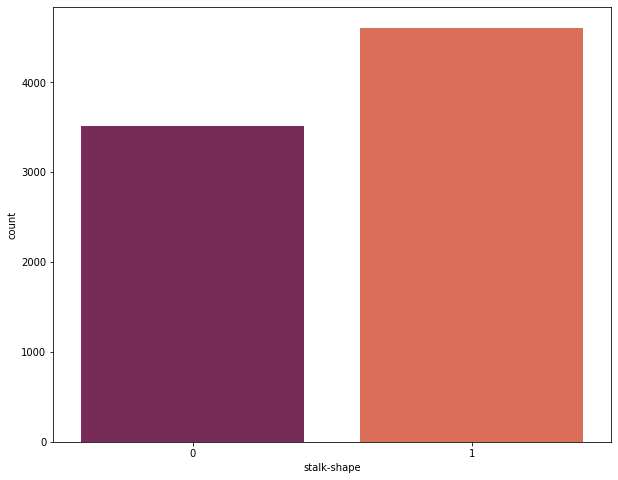

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(data=df,x='stalk-shape',palette='rocket')

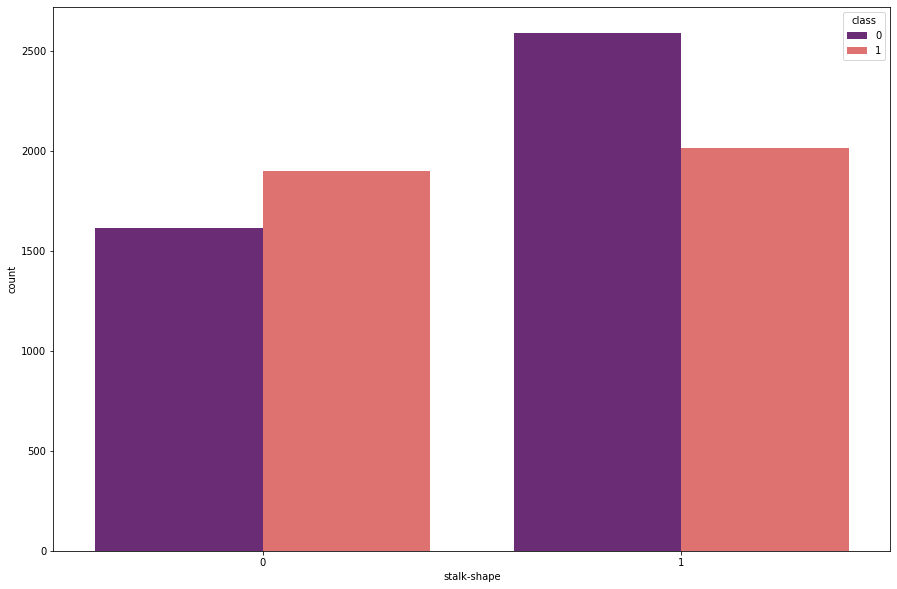

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(data=df,x='stalk-shape',hue='class',palette='magma')
plt.show()

In [ ]:
df['stalk-root'].value_counts()

1    3776
0    2480
3    1120
2     556
4     192
Name: stalk-root, dtype: int64

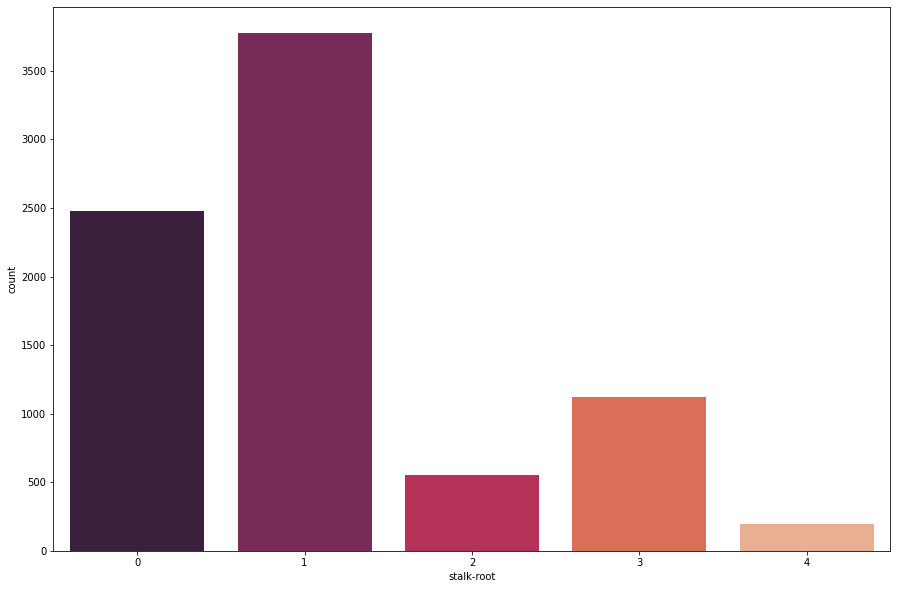

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(data=df,x='stalk-root',palette='rocket')

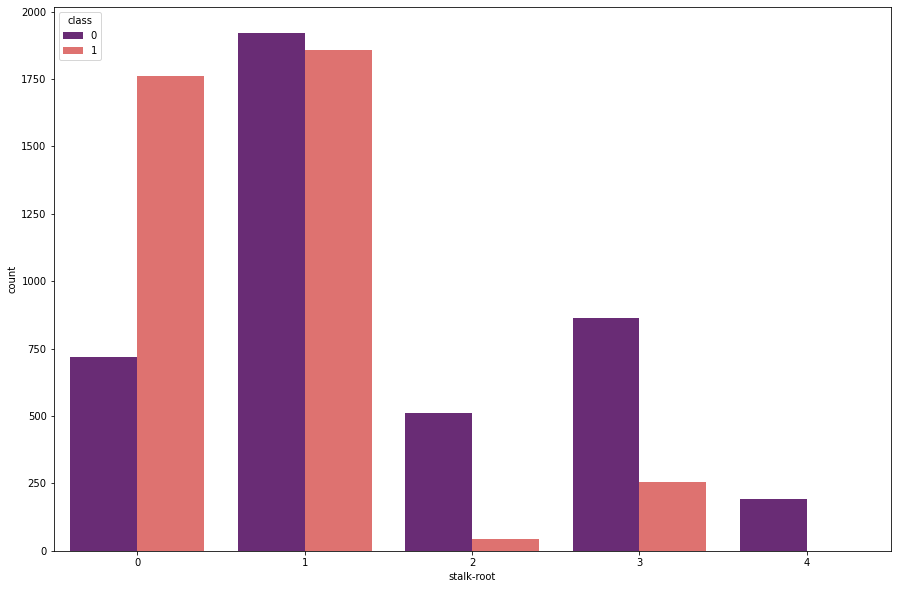

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(data=df,x='stalk-root',hue='class',palette='magma')
plt.show()

In [ ]:
df['habitat'].value_counts()

0    3148
1    2148
4    1144
2     832
5     368
3     292
6     192
Name: habitat, dtype: int64

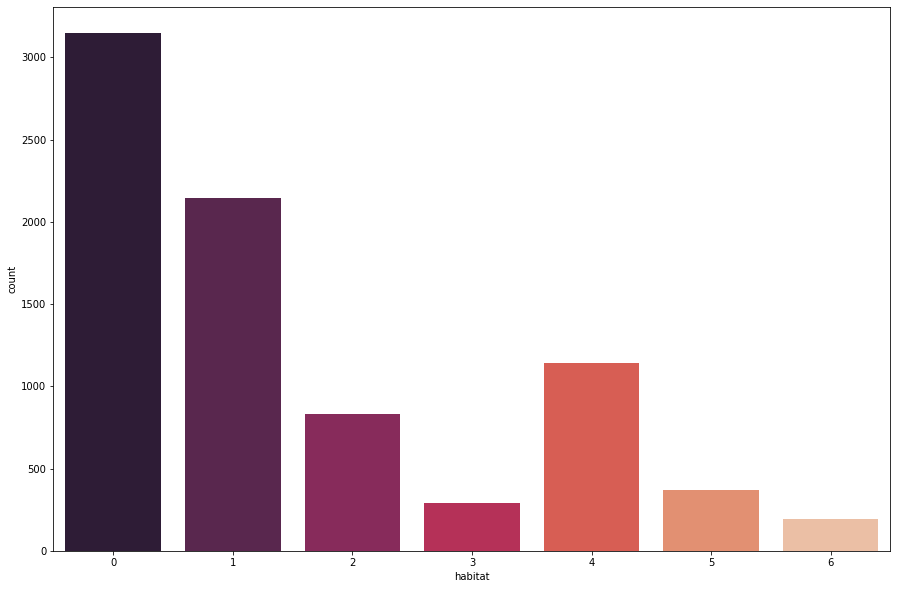

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(data=df,x='habitat',palette='rocket')

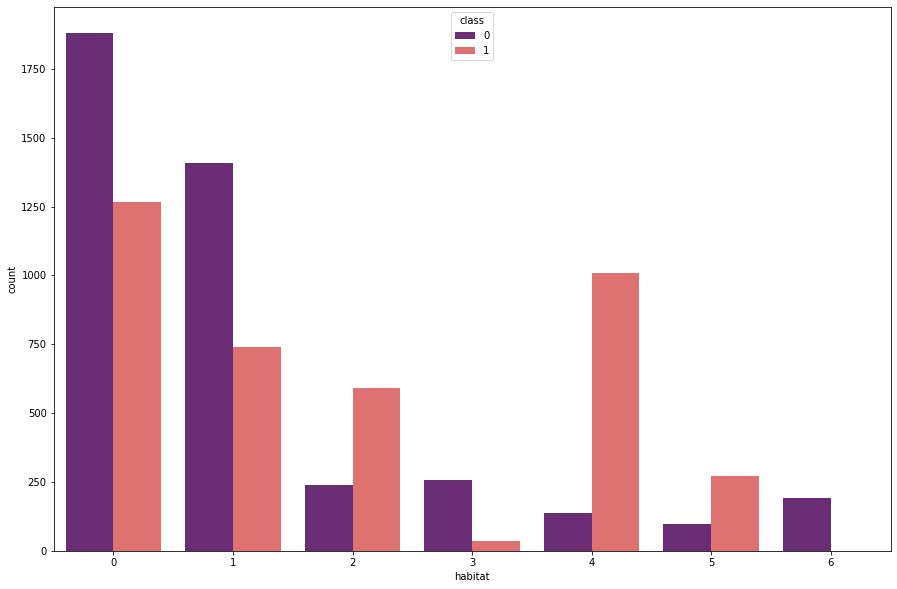

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(data=df,x='habitat',hue='class',palette='magma')
plt.show()

In [ ]:
def plot_column(x, y):
    plt.figure(figsize=(15, 10))                   
    plt.legend(['Poisonous', 'Edible'], loc='upper right')
    plt.ylabel('Count of the Mushrooms', fontsize=15)
    plt.xlabel('Types of the Cap Shapes of the Mushrooms', fontsize=15)
    plt.title(f'Edible or Poisonous Based on {y}', fontsize=20)
    plotcolumn = sns.countplot(data=df, x=x ,hue='class',order=x.value_counts().index, palette=['red', 'lightgreen'])                     
    for p in plotcolumn.patches:
        plotcolumn.annotate(format(p.get_height(), '.1f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center')

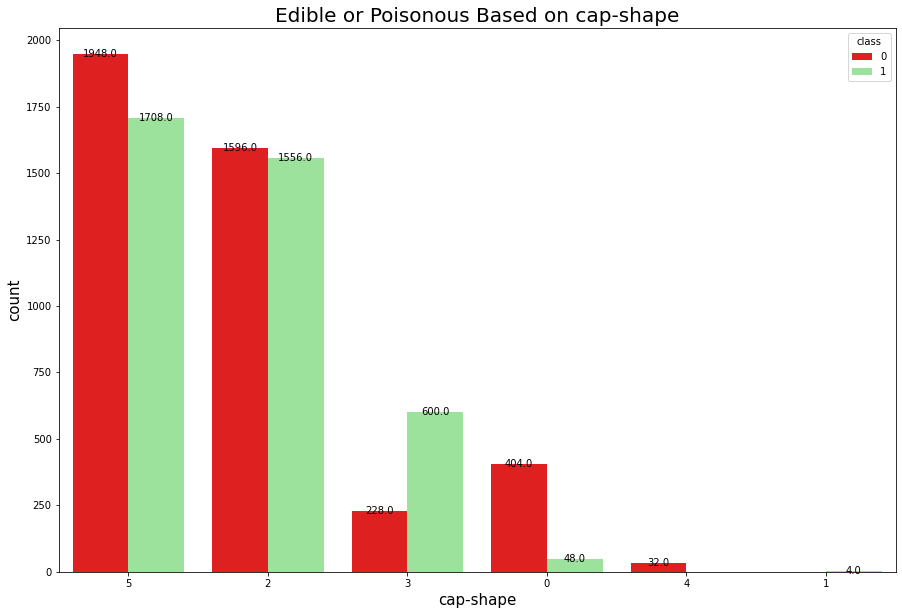

In [ ]:
plot_column(df['cap-shape'], 'cap-shape')

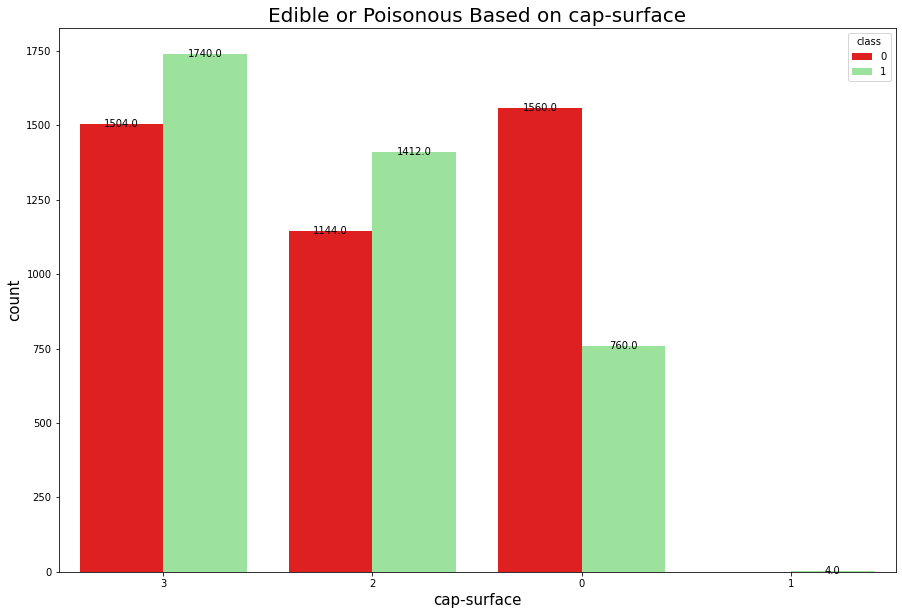

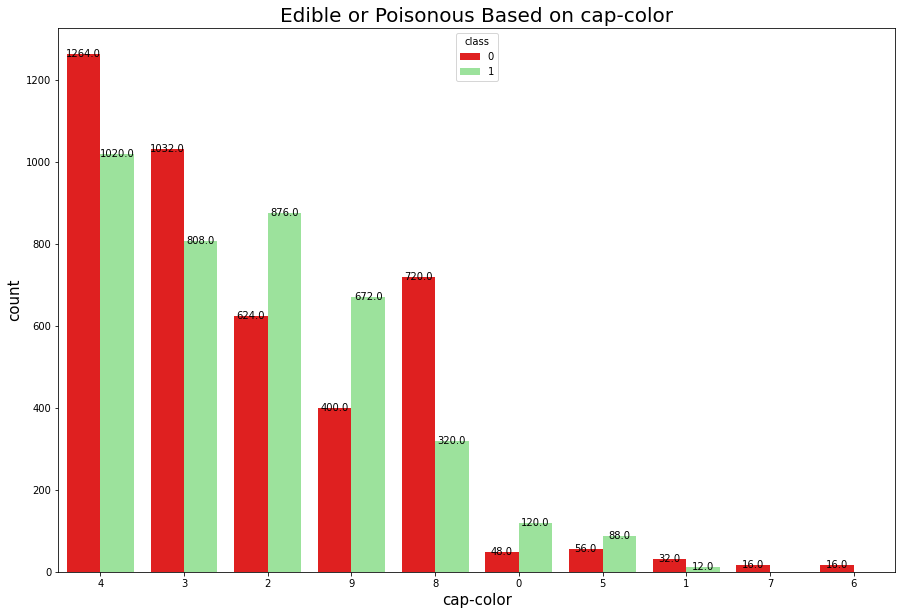

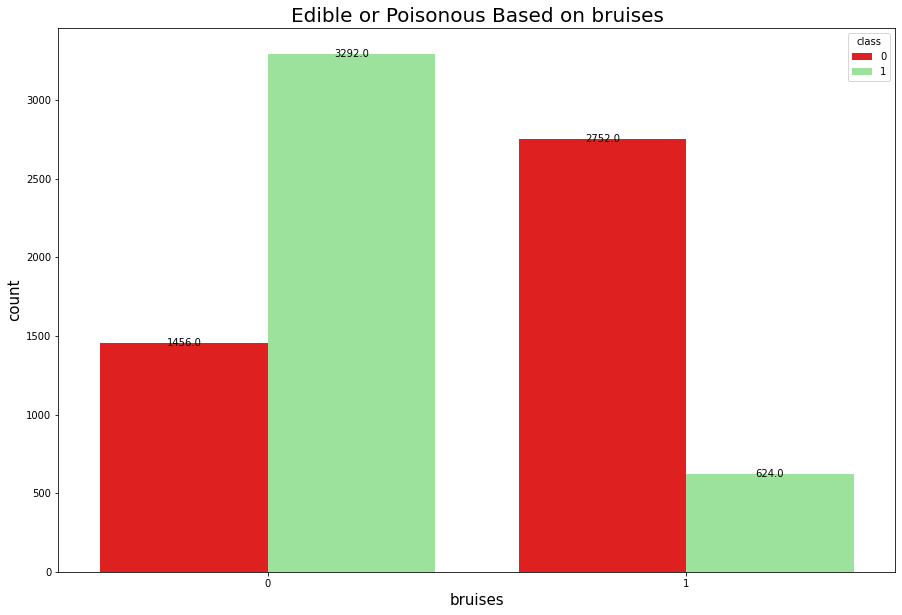

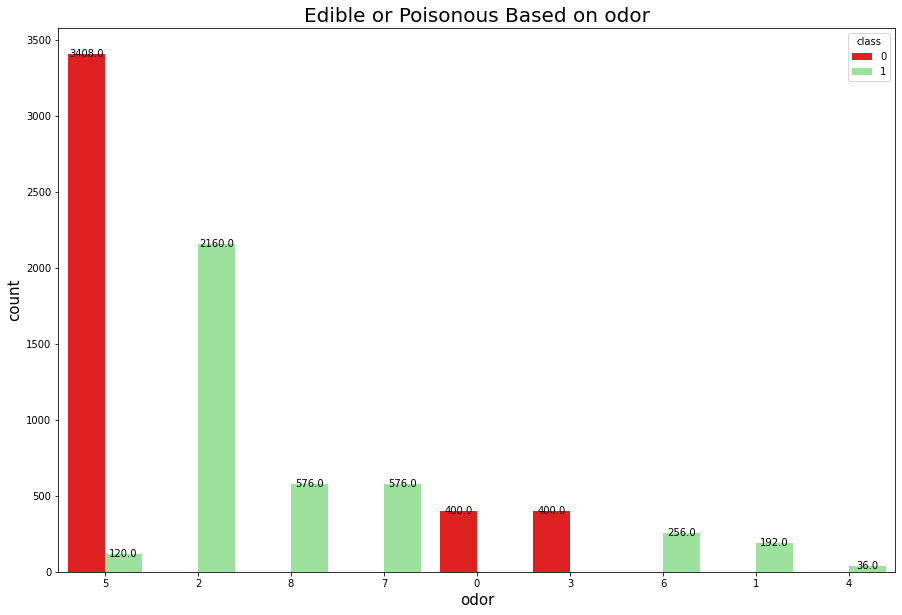

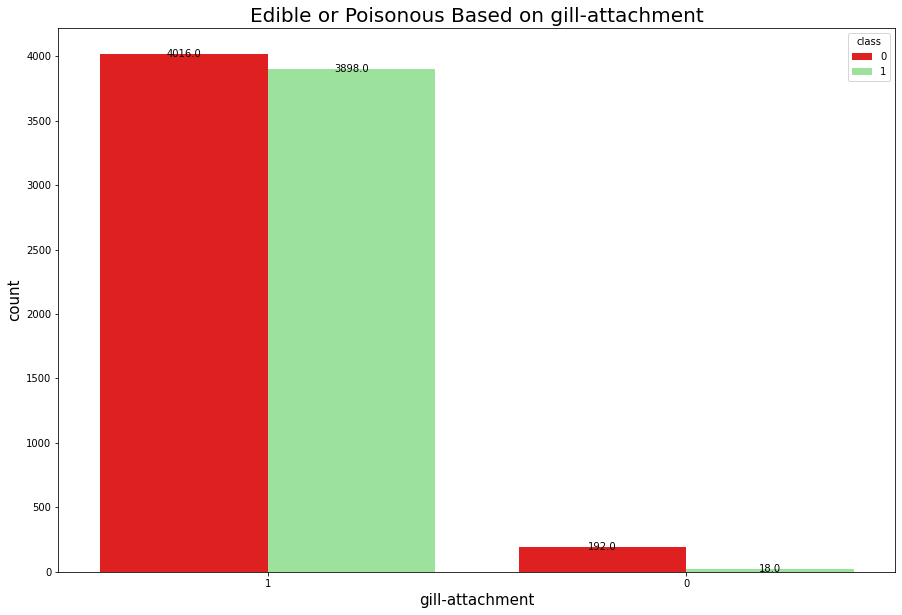

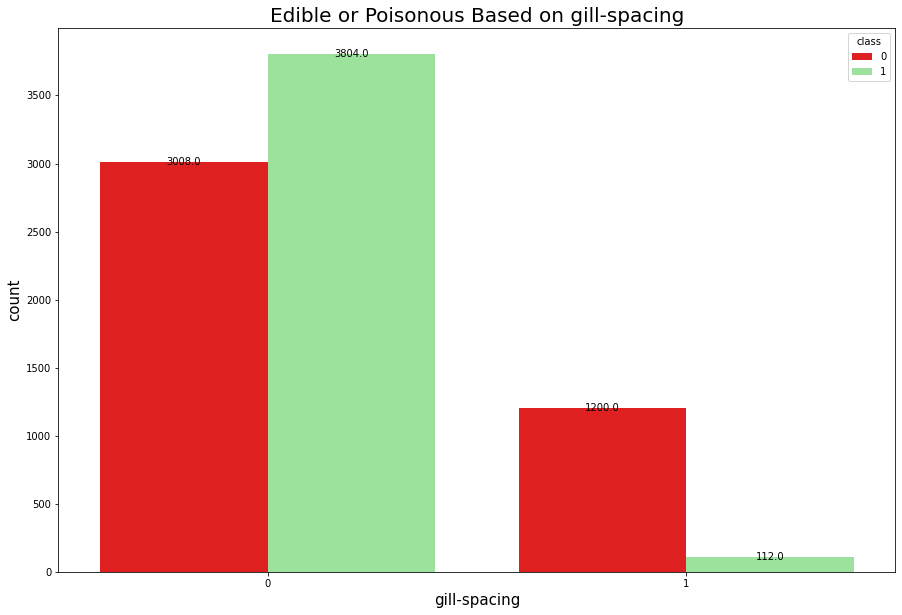

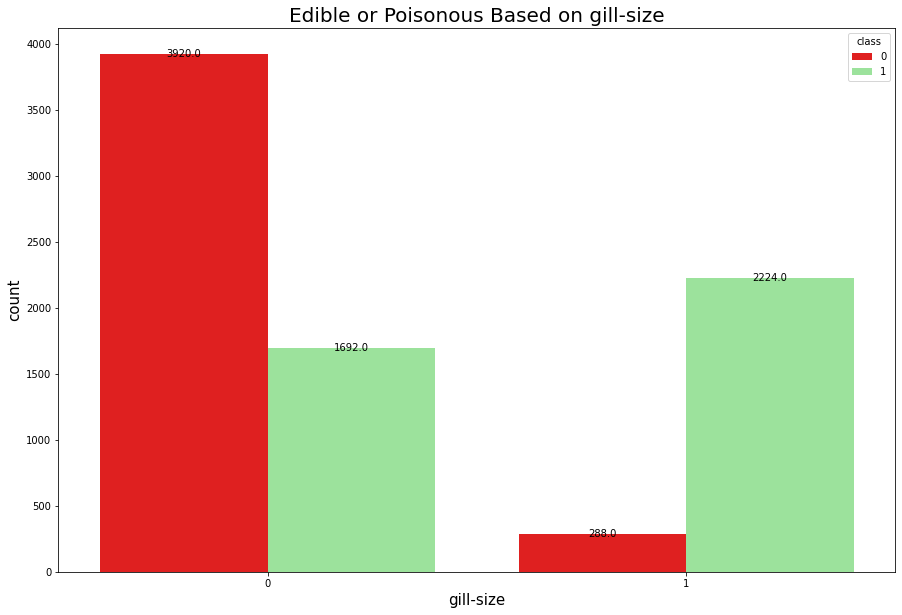

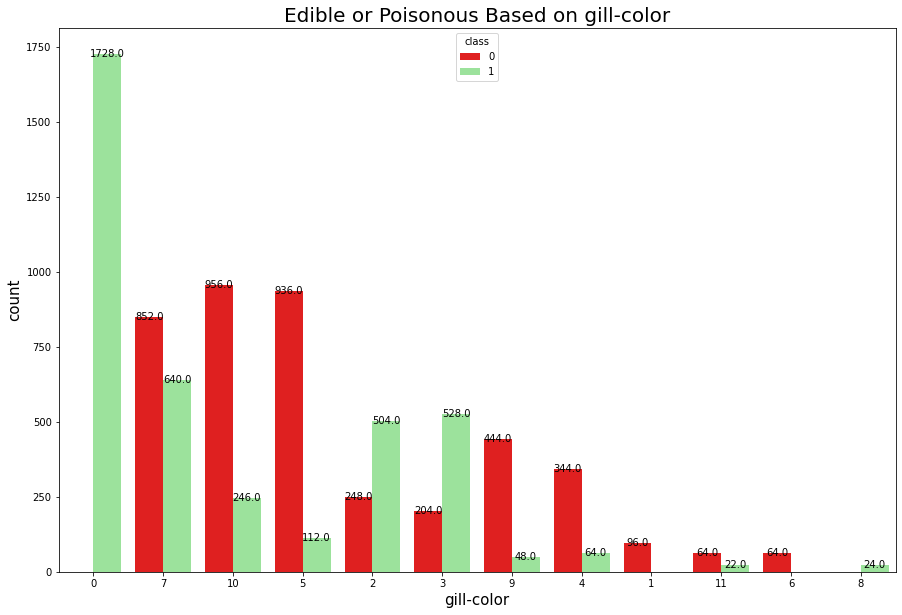

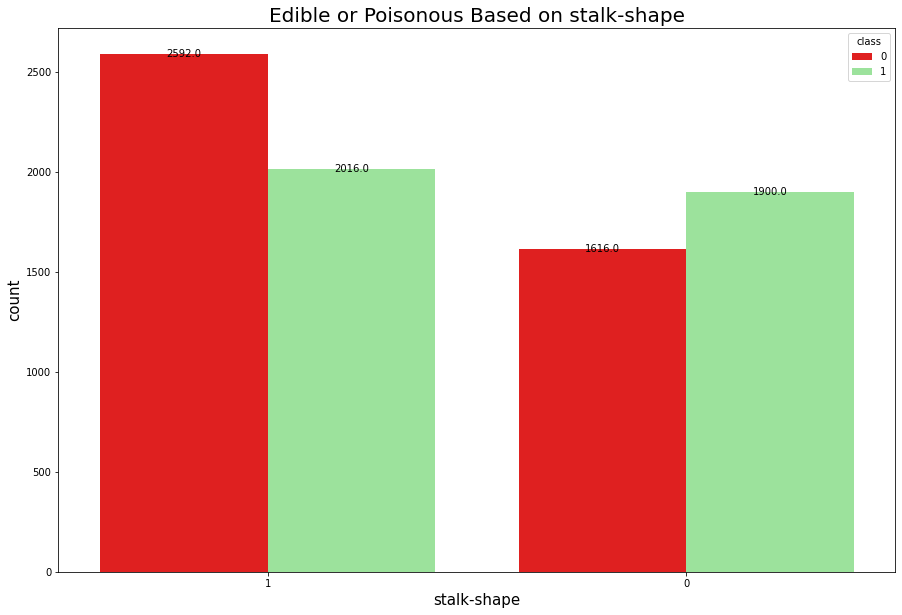

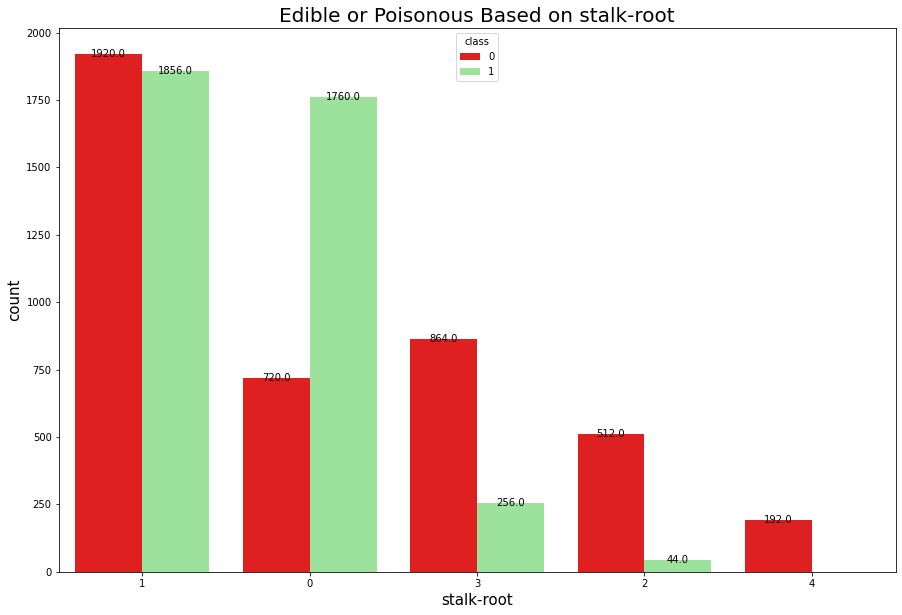

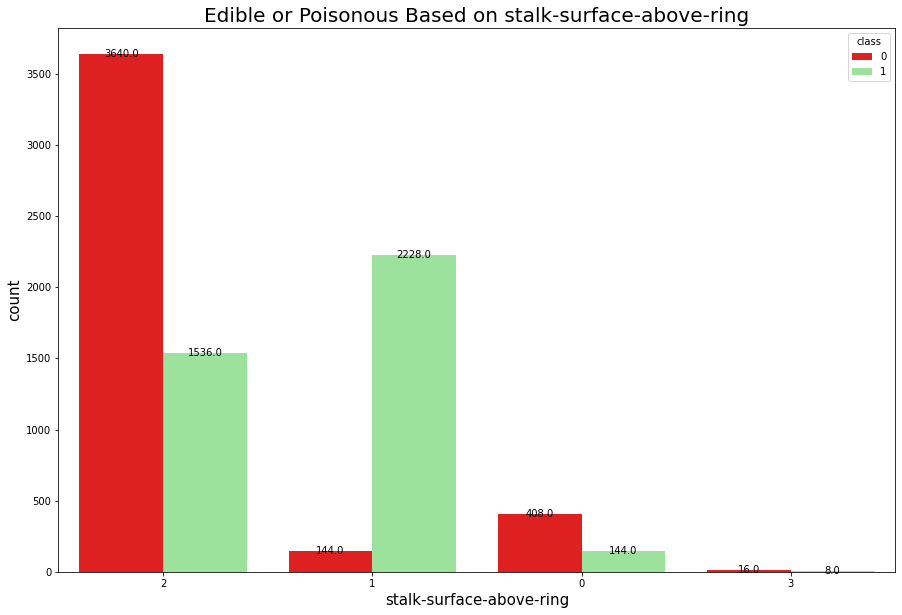

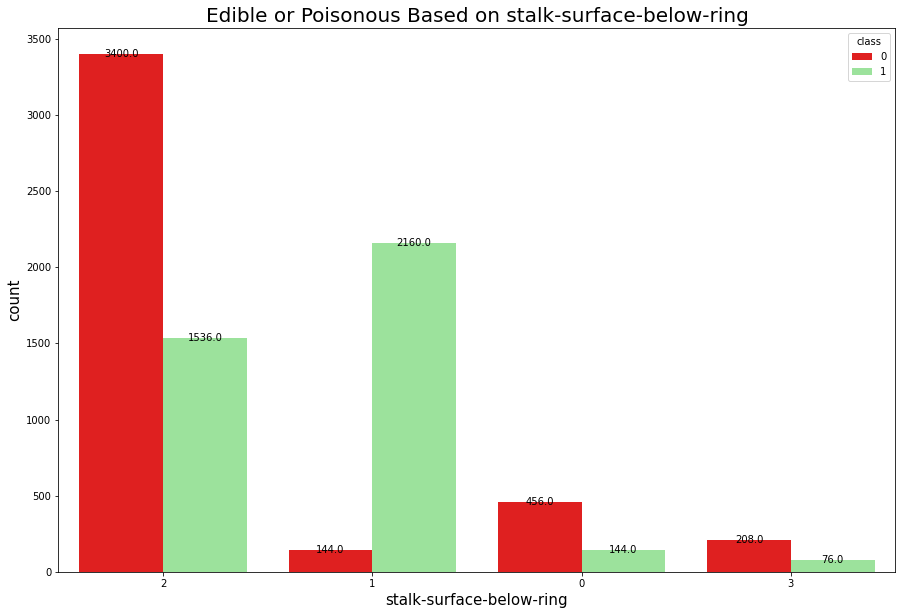

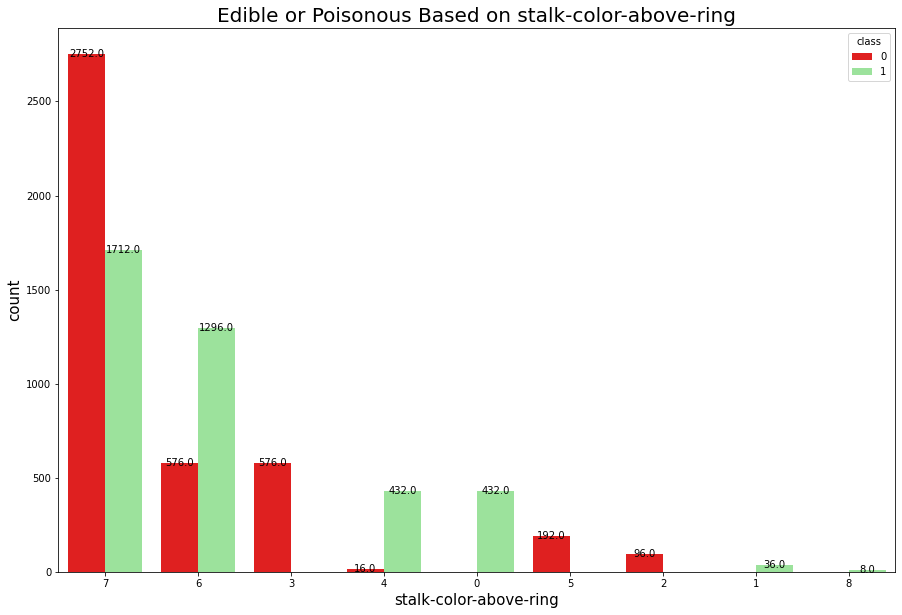

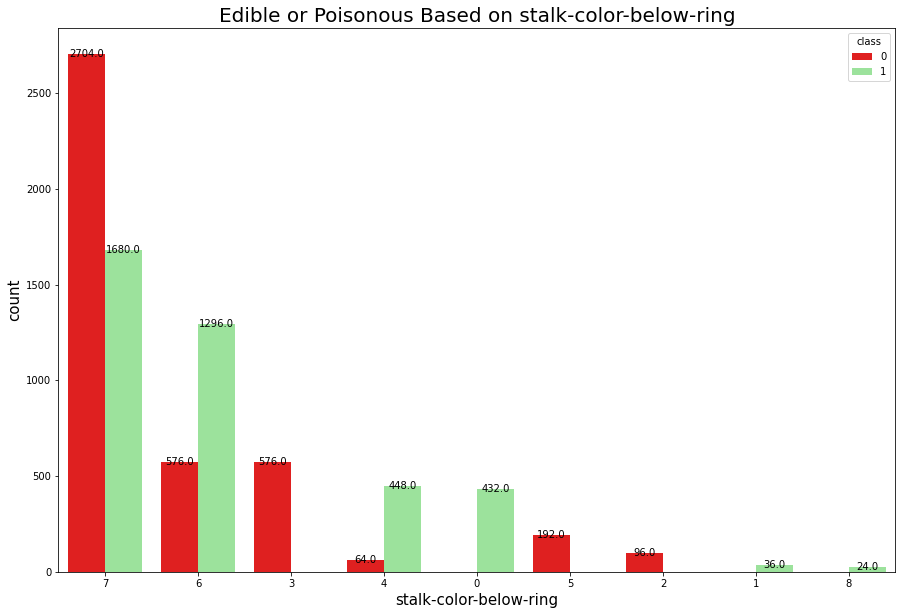

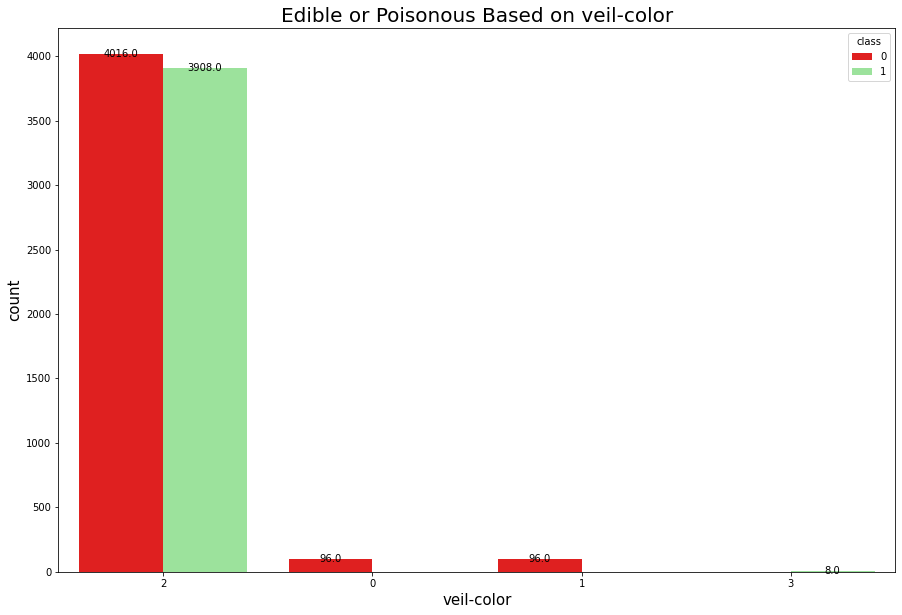

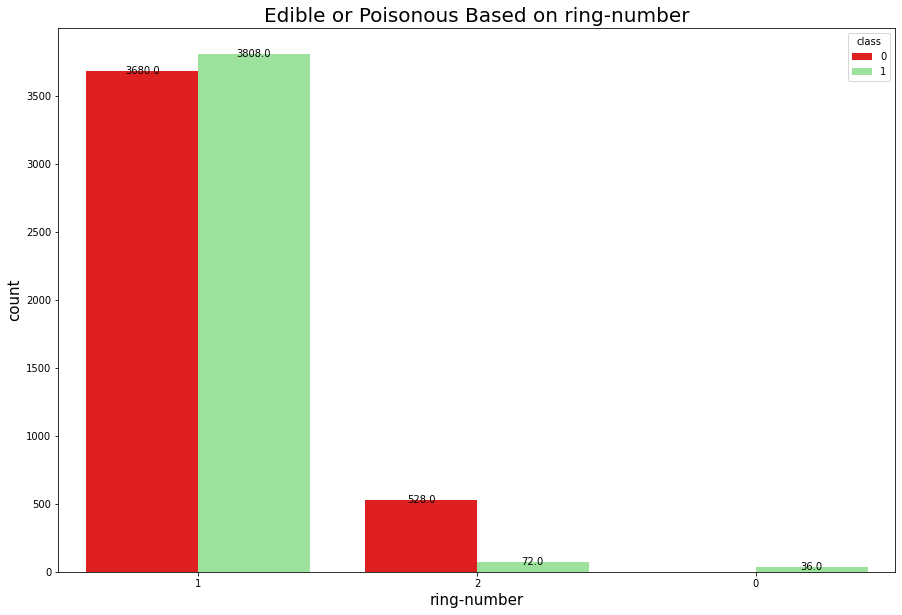

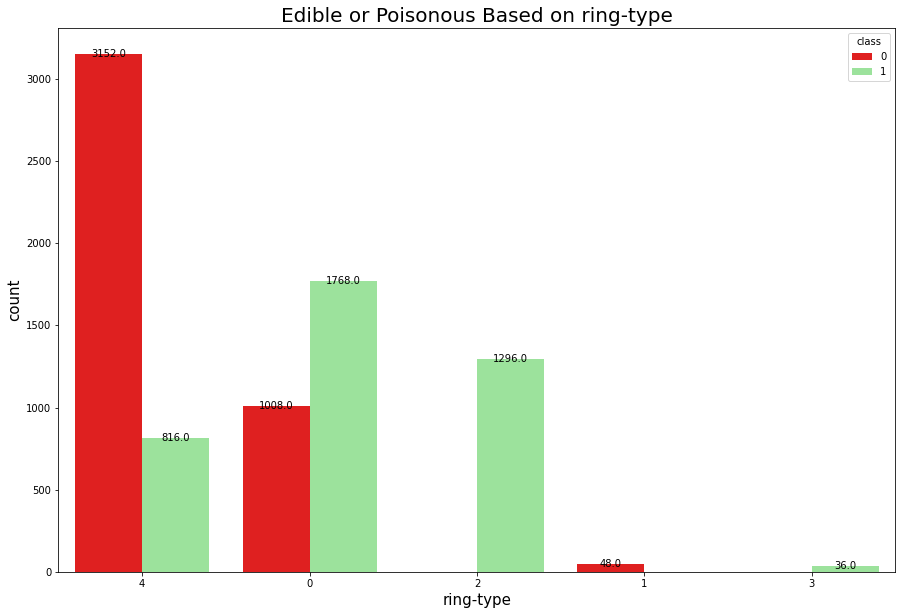

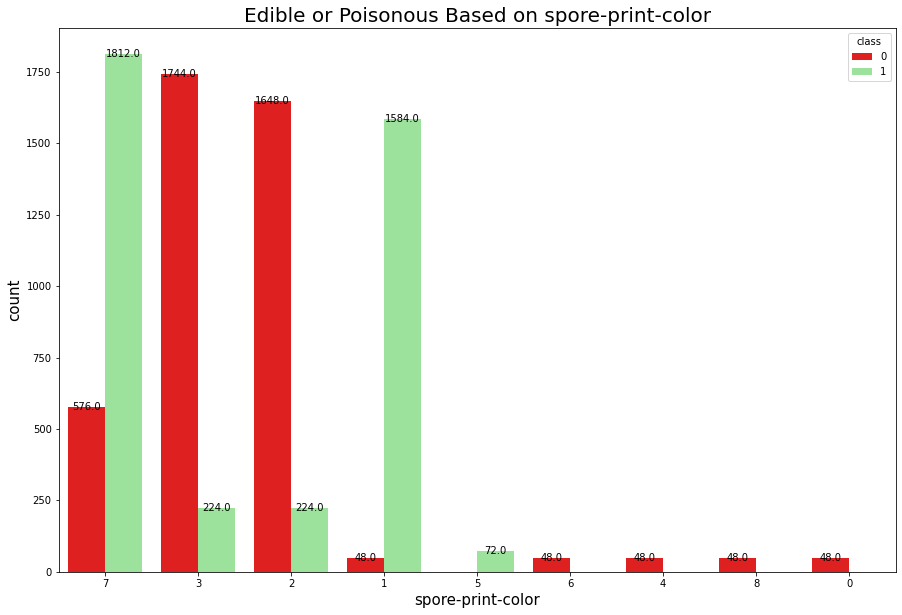

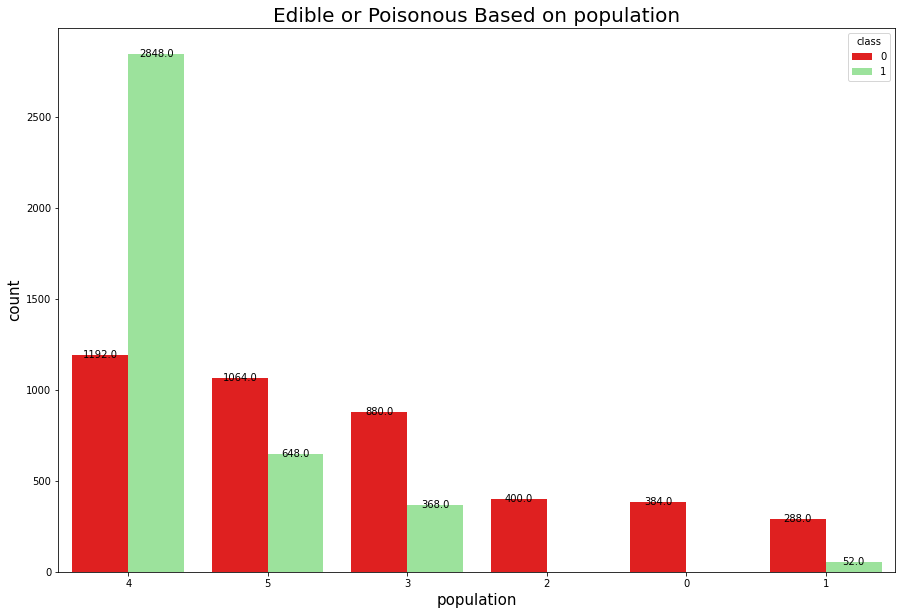

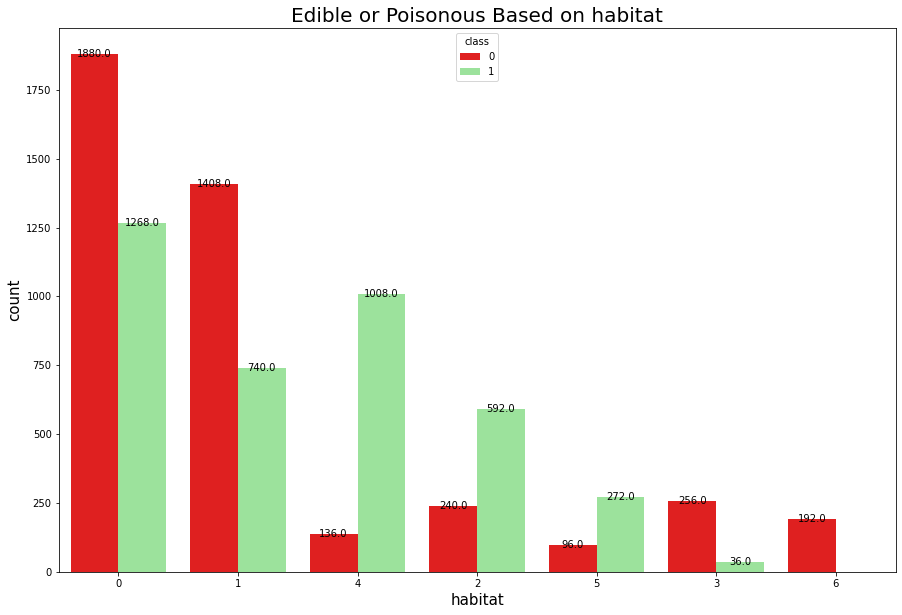

In [ ]:
cols = ['cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number','ring-type', 'spore-print-color', 'population', 'habitat']
for col in cols:
    plot_column(df[col], col)

In [ ]:
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1


**Data Prepration**

In [ ]:
x = df.iloc[:, 1:22]
y = df.loc[:,"class"]

In [ ]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,2,1,0,7,4,2


In [ ]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

In [ ]:
x.shape

(8124, 21)

In [ ]:
y.shape

(8124,)

In [ ]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.4,random_state=42)
X_train.shape, X_test.shape

((4874, 21), (3250, 21))

**Model Building For Classification**

**1. Logistic Regression**

In [ ]:
# Import Logistic Regression to Train from SKlearn
Logistic_Regression  = LogisticRegression()
Logistic_Regression.fit(X_train,y_train)

LogisticRegression()

In [ ]:
print('Intercept is :',Logistic_Regression.intercept_)
print('Coefficient is :',Logistic_Regression.coef_)

Intercept is : [0.61833871]
Coefficient is : [[-0.04945451  0.47449204 -0.0342277  -0.96030166 -0.47751897 -1.41712395
  -5.89505913  6.76019593 -0.1084233  -0.04907577 -1.62959004 -3.75426176
  -0.51046449 -0.13451458 -0.04948187  5.44311305  0.86046261  0.74928411
  -0.23413865 -0.32607832  0.09288278]]


In [ ]:
print("Training Score:",Logistic_Regression.score(X_train, y_train))
print("Test Score:",Logistic_Regression.score(X_test,y_test))

Training Score: 0.9505539597866229
Test Score: 0.9535384615384616


In [ ]:
Logistic_Regression_Prediction = Logistic_Regression.predict(X_test)
Logistic_Regression_Prediction

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
Actual_predicted = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': Logistic_Regression_Prediction})    
Actual_predicted.head(10)

,Actual Values,Predicted Values
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
5761,1,1
5798,1,1
3064,1,1
1811,0,0
3422,0,0


In [ ]:
Score = accuracy_score(y_test,Logistic_Regression_Prediction)
Classification_Report = classification_report(y_test,Logistic_Regression_Prediction)

print("Logistic Regression")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

Logistic Regression
Accuracy Score value: 0.9535
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1678
           1       0.95      0.95      0.95      1572

    accuracy                           0.95      3250
   macro avg       0.95      0.95      0.95      3250
weighted avg       0.95      0.95      0.95      3250



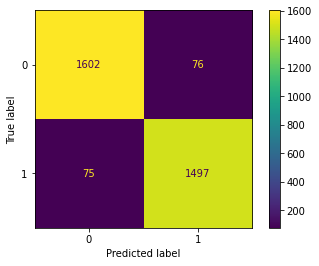

In [ ]:
Logistic_Regression_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(Logistic_Regression, X_test, y_test)
Logistic_Regression_Confusion_Matrix

**2. SVM Classification**

In [ ]:
from sklearn.svm import SVC

support_vector_classifier = SVC(random_state=0, gamma="auto")
support_vector_classifier.fit(X_train, y_train)

SVC(gamma='auto', random_state=0)

In [ ]:
print("Training Score:",support_vector_classifier.score(X_train, y_train))
print("Test Score:",support_vector_classifier.score(X_test,y_test))

Training Score: 1.0
Test Score: 1.0


In [ ]:
support_vector_classifier_Prediction = support_vector_classifier.predict(X_test)
support_vector_classifier_Prediction

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
Actual_predicted = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': support_vector_classifier_Prediction})    
Actual_predicted.head(10)

,Actual Values,Predicted Values
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
5761,1,1
5798,1,1
3064,1,1
1811,0,0
3422,0,0


In [ ]:
Score = accuracy_score(y_test,support_vector_classifier_Prediction)
Classification_Report = classification_report(y_test,support_vector_classifier_Prediction)

print("Support Vector Classifier")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

Support Vector Classifier
Accuracy Score value: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1678
           1       1.00      1.00      1.00      1572

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



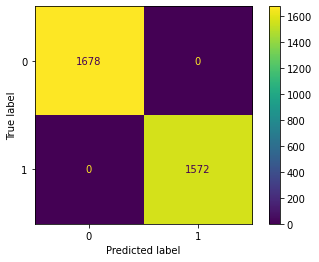

In [ ]:
Support_vector_classifier_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(support_vector_classifier, X_test, y_test)
Support_vector_classifier_Confusion_Matrix

**3. Naive Bayes Classification**

In [ ]:
from sklearn.naive_bayes import GaussianNB

Naive_Bayes_Classifier = GaussianNB()
Naive_Bayes_Classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
print("Training Score:",Naive_Bayes_Classifier.score(X_train, y_train))
print("Test Score:",Naive_Bayes_Classifier.score(X_test,y_test))

Training Score: 0.9257283545342634
Test Score: 0.9301538461538461


In [ ]:
Naive_Bayes_Classifier_Prediction = Naive_Bayes_Classifier.predict(X_test)
Naive_Bayes_Classifier_Prediction

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
Actual_predicted = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': Naive_Bayes_Classifier_Prediction})    
Actual_predicted.head(10)

,Actual Values,Predicted Values
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
5761,1,1
5798,1,1
3064,1,1
1811,0,0
3422,0,0


In [ ]:
Score = accuracy_score(y_test,Naive_Bayes_Classifier_Prediction)
Classification_Report = classification_report(y_test,Naive_Bayes_Classifier_Prediction)

print("Naive Bayes Classifier")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

Naive Bayes Classifier
Accuracy Score value: 0.9302
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1678
           1       0.93      0.93      0.93      1572

    accuracy                           0.93      3250
   macro avg       0.93      0.93      0.93      3250
weighted avg       0.93      0.93      0.93      3250



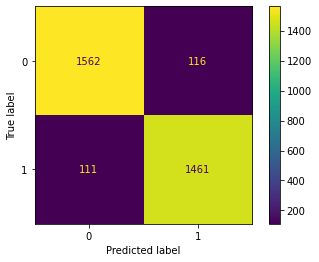

In [ ]:
Naive_Bayes_Classifier_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(Naive_Bayes_Classifier, X_test, y_test)
Naive_Bayes_Classifier_Confusion_Matrix

**4. Decision Tree**

In [ ]:
Decision_Tree_Classifier = DecisionTreeClassifier()
Decision_Tree_Classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
Decision_Tree_Classifier_prediction = Decision_Tree_Classifier.predict(X_test)
Decision_Tree_Classifier_prediction

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
Actual_predicted = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': Decision_Tree_Classifier_prediction})    
Actual_predicted.head(10)

,Actual Values,Predicted Values
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
5761,1,1
5798,1,1
3064,1,1
1811,0,0
3422,0,0


In [ ]:
Score = accuracy_score(y_test,Decision_Tree_Classifier_prediction)
Classification_Report = classification_report(y_test,Decision_Tree_Classifier_prediction)

print("Decision Tree")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

Decision Tree
Accuracy Score value: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1678
           1       1.00      1.00      1.00      1572

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



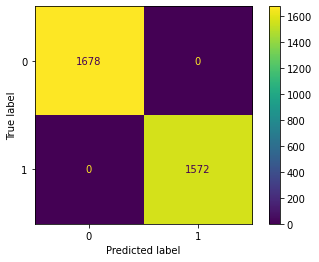

In [ ]:
Decision_Tree_Classifier_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(Decision_Tree_Classifier, X_test, y_test)
Decision_Tree_Classifier_Confusion_Matrix

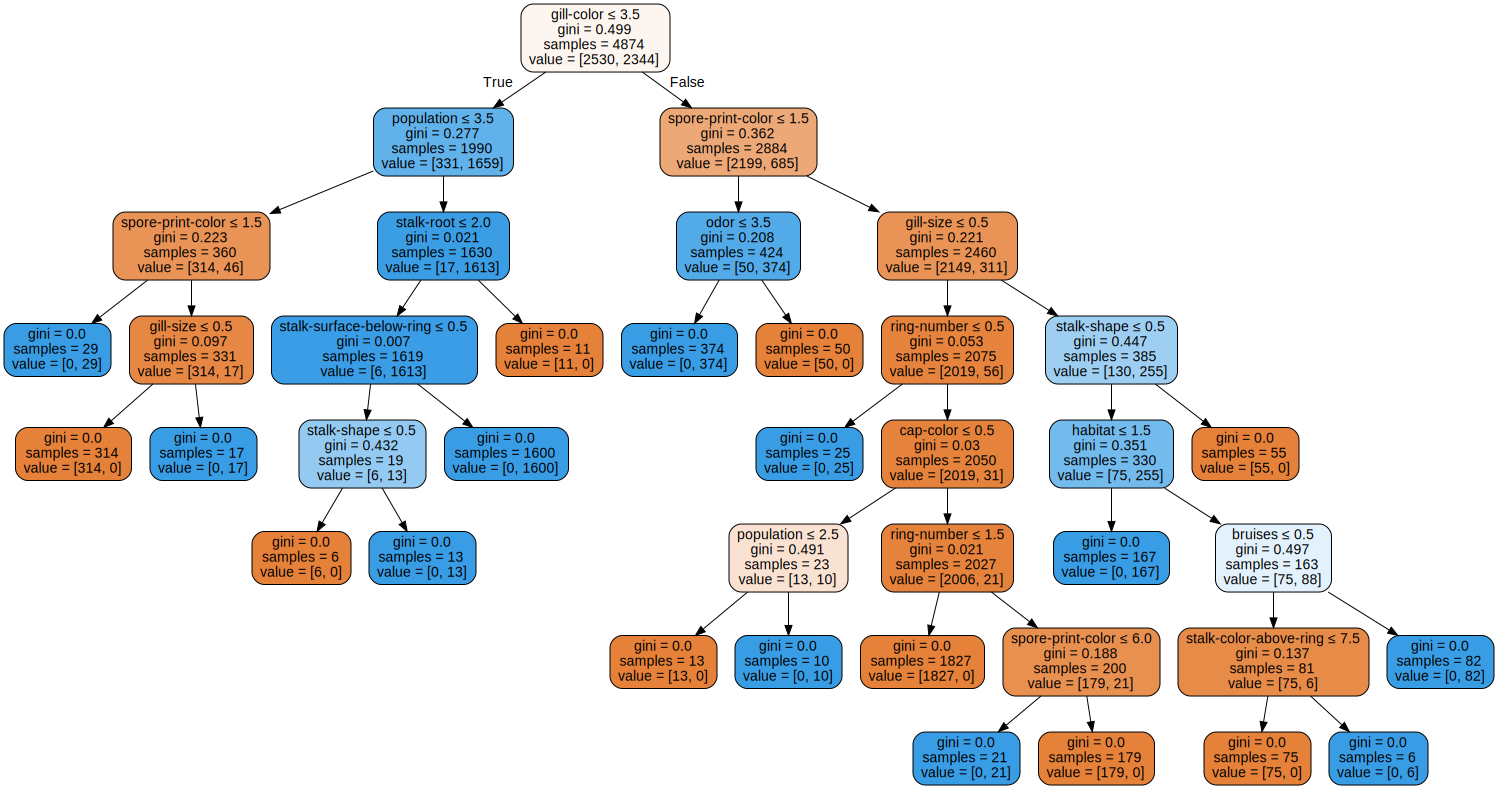

<Figure size 1080x720 with 0 Axes>

In [ ]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from sklearn.tree import export_graphviz
import graphviz

plt.figure(figsize = (15,10))
dot_data = export_graphviz(Decision_Tree_Classifier, out_file=None, 
                         feature_names=x.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph

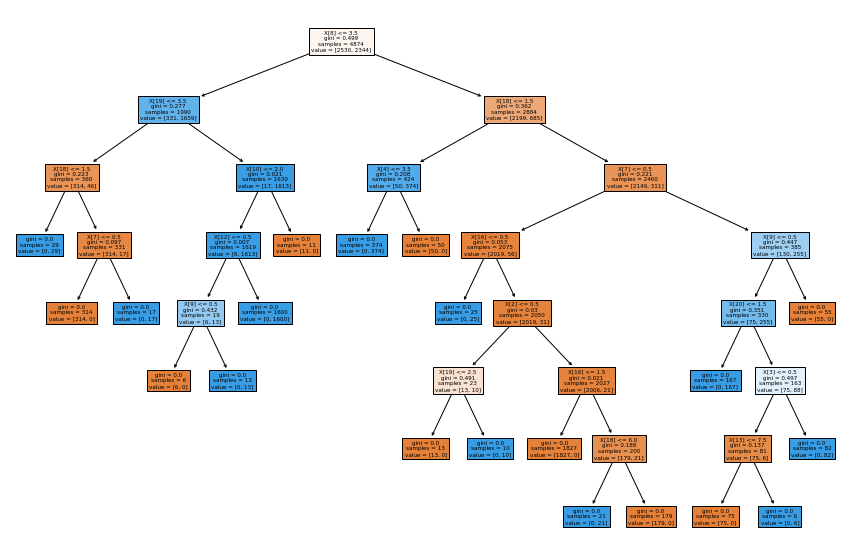

In [ ]:
plt.figure(figsize = (15,10))
tree.plot_tree(Decision_Tree_Classifier,filled = True)
plt.show()

**5. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest_Classifier = RandomForestClassifier()
Random_Forest_Classifier.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
print("Training Score:",Random_Forest_Classifier.score(X_train, y_train))
print("Test Score:",Random_Forest_Classifier.score(X_test,y_test))

Training Score: 1.0
Test Score: 1.0


In [ ]:
Random_Forest_Classifier_prediction = Random_Forest_Classifier.predict(X_test)
Random_Forest_Classifier_prediction

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
Actual_predicted = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': Random_Forest_Classifier_prediction})    
Actual_predicted.head(10)

,Actual Values,Predicted Values
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
5761,1,1
5798,1,1
3064,1,1
1811,0,0
3422,0,0


In [ ]:
Score = accuracy_score(y_test,Random_Forest_Classifier_prediction)
Classification_Report = classification_report(y_test,Random_Forest_Classifier_prediction)

print("Random Forest")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

Random Forest
Accuracy Score value: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1678
           1       1.00      1.00      1.00      1572

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



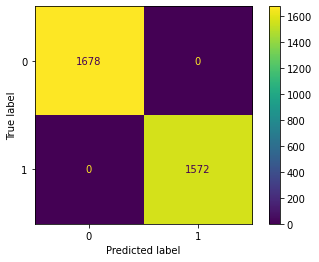

In [ ]:
Random_Forest_Classifier_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(Random_Forest_Classifier, X_test, y_test)
Random_Forest_Classifier_Confusion_Matrix

**6. K_Neighbors Classifier**

In [ ]:
# KNeighborsClassifier to Train from SKlearn
K_Neighbors_Classifier = KNeighborsClassifier()
K_Neighbors_Classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
print("Training Score:",K_Neighbors_Classifier.score(X_train, y_train))
print("Test Score:",K_Neighbors_Classifier.score(X_test,y_test))

Training Score: 0.9995896594173164
Test Score: 0.9966153846153846


In [ ]:
K_Neighbors_Classifier_prediction = K_Neighbors_Classifier.predict(X_test)
K_Neighbors_Classifier_prediction

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
Actual_predicted = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': K_Neighbors_Classifier_prediction})    
Actual_predicted.head(10)

,Actual Values,Predicted Values
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
5761,1,1
5798,1,1
3064,1,1
1811,0,0
3422,0,0


In [ ]:
Score = accuracy_score(y_test,K_Neighbors_Classifier_prediction)
Classification_Report = classification_report(y_test,K_Neighbors_Classifier_prediction)

print("KNeighbors Classifier")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

KNeighbors Classifier
Accuracy Score value: 0.9966
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1678
           1       0.99      1.00      1.00      1572

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



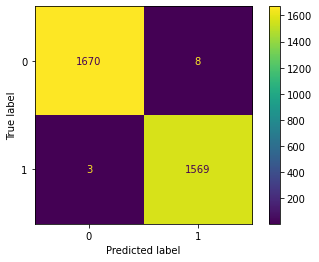

In [ ]:
K_Neighbors_Classifier_Confusion_Matrix = ConfusionMatrixDisplay.from_estimator(K_Neighbors_Classifier, X_test, y_test)
K_Neighbors_Classifier_Confusion_Matrix

**7. XGboost Model**

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier()

In [ ]:
print("Training Score:",xgb.score(X_train, y_train))
print("Test Score:",xgb.score(X_test,y_test))

Training Score: 1.0
Test Score: 1.0


In [ ]:
xgb_predic = xgb.predict(X_test)
xgb_predic

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
Actual_predicted = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': xgb_predic})    
Actual_predicted.head(10)

,Actual Values,Predicted Values
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
5761,1,1
5798,1,1
3064,1,1
1811,0,0
3422,0,0


In [ ]:
Score = accuracy_score(y_test, xgb_predic)
Classification_Report = classification_report(y_test, xgb_predic)

print("XGboost Classifier")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

XGboost Classifier
Accuracy Score value: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1678
           1       1.00      1.00      1.00      1572

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



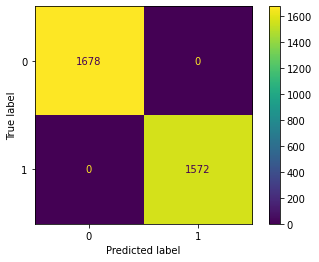

In [ ]:
xgb_cm = ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)

**8. Extra Trees**

In [ ]:
ETC = ExtraTreesClassifier()
ETC.fit(X_train, y_train)

ExtraTreesClassifier()

In [ ]:
print("Training Score:",ETC.score(X_train, y_train))
print("Test Score:",ETC.score(X_test,y_test))

Training Score: 1.0
Test Score: 1.0


In [ ]:
y_predic = ETC.predict(X_test)
y_predic

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
Actual_predicted = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_predic})    
Actual_predicted.head(10)

,Actual Values,Predicted Values
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
5761,1,1
5798,1,1
3064,1,1
1811,0,0
3422,0,0


In [ ]:
cross_val_score(ETC, x, y, scoring="accuracy", cv=100).mean()

1.0

In [ ]:
pd.crosstab(y_test,y_predic,rownames=["Actual"],colnames=["Predicted"])

Predicted,0,1
Actual,,
0,1678,0
1,0,1572


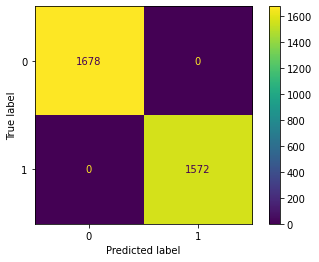

In [ ]:
ETC_cm = ConfusionMatrixDisplay.from_estimator(ETC, X_test, y_test)

In [ ]:
Score = accuracy_score(y_test, y_predic)
Classification_Report = classification_report(y_test, y_predic)

print("ExtraTreeClassifier Classifier")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

ExtraTreeClassifier Classifier
Accuracy Score value: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1678
           1       1.00      1.00      1.00      1572

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



**9. Gradient Boosting**

In [ ]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)


GradientBoostingClassifier()

In [ ]:
print("Training Score:",GBC.score(X_train, y_train))
print("Test Score:",GBC.score(X_test,y_test))

Training Score: 1.0
Test Score: 1.0


In [ ]:
GBC_predict = GBC.predict(X_test)
GBC_predict

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
Actual_predicted = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': GBC_predict})    
Actual_predicted.head(10)

,Actual Values,Predicted Values
1971,0,0
6654,1,1
5606,1,1
3332,0,0
6988,1,1
5761,1,1
5798,1,1
3064,1,1
1811,0,0
3422,0,0


In [ ]:
cross_val_score(GBC, x, y, scoring="accuracy", cv=100).mean()

1.0

In [ ]:
pd.crosstab(y_test,y_predic,rownames=["Actual"],colnames=["Predicted"])

Predicted,0,1
Actual,,
0,1678,0
1,0,1572


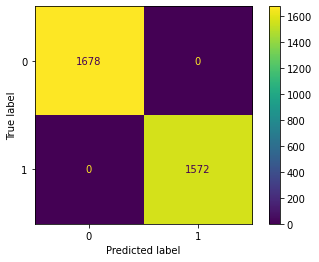

In [ ]:
ETC_cm = ConfusionMatrixDisplay.from_estimator(ETC, X_test, y_test)

In [ ]:
Score = accuracy_score(y_test, GBC_predict)
Classification_Report = classification_report(y_test, GBC_predict)

print("GradientBoostingClassifier Classifier")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

GradientBoostingClassifier Classifier
Accuracy Score value: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1678
           1       1.00      1.00      1.00      1572

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



**10. Voting**

In [ ]:
Rfc = RandomForestClassifier()
Etc = ExtraTreesClassifier()
Gb = GradientBoostingClassifier()

In [ ]:
Voting = VotingClassifier(estimators=[("RF",Rfc), ("ETC",Etc), ("GB",Gb)], voting="soft")
Voting.fit(X_train, y_train)

VotingClassifier(estimators=[('RF', RandomForestClassifier()),
                             ('ETC', ExtraTreesClassifier()),
                             ('GB', GradientBoostingClassifier())],
                 voting='soft')

In [ ]:
y_predict_Voting = Voting.predict(X_test)
y_predict_Voting

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
cross_val_score(Voting, x, y, scoring="accuracy", cv=10).mean()

0.9662949363483783

In [ ]:
pd.crosstab(y_test,y_predict_Voting,rownames=["Actual"],colnames=["Predicted"])

Predicted,0,1
Actual,,
0,1678,0
1,0,1572


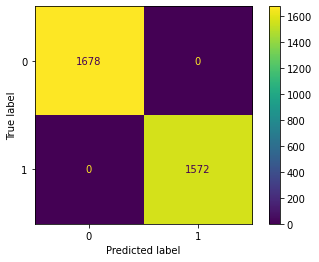

In [ ]:
Voting_cm = ConfusionMatrixDisplay.from_estimator(Voting, X_test, y_test)

In [ ]:
Score = accuracy_score(y_test, y_predict_Voting)
Classification_Report = classification_report(y_test, y_predict_Voting)

print("Voting")
print ("Accuracy Score value: {:.4f}".format(Score))
print (Classification_Report)

Voting
Accuracy Score value: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1678
           1       1.00      1.00      1.00      1572

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250



### **Accuracy score Results Summary**

| Models     | Accuracy score  |
| ----------- | ----------- |
| Logistic Regression  | 95.35 % |
| Support Vector Classifier | 100 % |
| Naive Bayes Classifier  | 93.02 % |
| Decision Tree Classifier  | 100 % |
| Random Forest Classifier     | 100 % |
| K Neighbors Classifier  | 99.66 %|
|XGBoost  | 100 % |
| Extra Tree Classifier | 100 % |
| Grediant Bossting Classifier  | 100 % |
| Voting | 100 % |




Most classifiers provide almost 100% accuracy